In [ ]:
import pandas as pd
structured_newdf=pd.read_csv("structured_newdf.csv")

In [ ]:
structured_newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [ ]:
# Find indices of rows where 'NIC Name' matches unwanted values
indices_to_drop = structured_newdf[structured_newdf["NIC Name"].isin(["Total", "", "Blank", "Incomplete description/ Wrongly Classifed", "blank etc"])].index

# Drop the identified rows
structured_newdf.drop(indices_to_drop, axis=0, inplace=True)

# Reset index after dropping rows
structured_newdf.reset_index(drop=True, inplace=True)

# Display updated DataFrame
print(structured_newdf)


       State Code District Code           India/States Division Group  Class  \
0             `08          `000      STATE - RAJASTHAN      `01  `000  `0000   
1             `08          `000      STATE - RAJASTHAN      `01  `011  `0000   
2             `08          `000      STATE - RAJASTHAN      `01  `011  `0111   
3             `08          `000      STATE - RAJASTHAN      `01  `011  `0112   
4             `08          `000      STATE - RAJASTHAN      `01  `011  `0113   
...           ...           ...                    ...      ...   ...    ...   
192762        `21          `399  District - Malkangiri      `97  `970  `9700   
192763        `21          `399  District - Malkangiri      `98  `000  `0000   
192764        `21          `399  District - Malkangiri      `98  `981  `0000   
192765        `21          `399  District - Malkangiri      `98  `981  `9810   
192766        `21          `399  District - Malkangiri      `99  `000  `0000   

                                       

In [ ]:
len(indices_to_drop)

2378

In [ ]:
structured_newdf.shape

(192767, 27)

In [ ]:
structured_newdf.to_csv("structurednewdf.csv",index=False)

In [ ]:
structured_newcleaneddf=pd.read_csv("structurednewdf.csv")

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    tokens = text.split() # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
structured_newcleaneddf['Cleaned_NIC_Name'] = structured_newcleaneddf['NIC Name'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Vectorize the descriptions using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(structured_newcleaneddf['Cleaned_NIC_Name'])

# Step 2: Apply KMeans clustering with 11 clusters
kmeans = KMeans(n_clusters=11, random_state=42)
structured_newcleaneddf['Cluster'] = kmeans.fit_predict(X)

# Step 3: Define expanded industry keywords for each of the 11 clusters
industry_keywords = {
    'Food and Personal Services': [
        'food', 'service', 'maintenance', 'motor', 'vehicle', 'repair', 'motorcycle', 'sale',
        'event catering', 'accommodation'
    ],
    'Accounting and Legal Services': [
        'accounting', 'finance', 'tax', 'consultancy', 'business', 'legal', 'services', 'audit', 'bookkeeping',
        'monetary intermediation', 'central banking', 'financial leasing', 'insurance', 'reinsurance',
        'pension funding'
    ],
    'Manufacturing and Engineering': [
        'manufacturing', 'manufacture', 'engineering', 'metal', 'products', 'industrial', 'factory',
        'machinery', 'production', 'steel', 'processing preserving meat', 'processing preserving fish',
        'spinning weaving finishing textiles', 'weaving textiles', 'finishing textiles',
        'tanning dressing leather', 'cutting shaping finishing stone'
    ],
    'Agriculture and Forestry': [
        'agriculture', 'crop', 'animal', 'production', 'forestry', 'silviculture', 'farming', 'rural', 'technology',
        'growing', 'plant', 'poultry', 'fishing', 'cattles', 'buffaloes', 'raising', 'raising horses',
        'raising breeding camels', 'raising sheep goats', 'raising swinepigs', 'seed processing propagation',
        'logging', 'aquaculture', 'marine aquaculture', 'freshwater aquaculture'
    ],
    'Retail and Wholesale': [
        'retail', 'wholesale', 'trade', 'goods', 'market', 'store', 'product', 'distribution', 'consumer'
    ],
    'Education': [
        'education', 'training', 'university', 'school', 'course', 'teacher', 'learning', 'diploma', 'student',
        'book publishing', 'publishing directories mailing lists', 'publishing newspapers journals periodicals'
    ],
    'Healthcare and Medical Services': [
        'health', 'medical', 'doctor', 'clinic', 'hospital', 'treatment', 'care', 'pharmacy'
    ],
    'Transportation and Logistics': [
        'transport', 'logistics', 'shipping', 'delivery', 'freight', 'cargo', 'rail', 'vehicle'
    ],
    'Information Technology and Software': [
        'software', 'technology', 'IT', 'computer', 'digital', 'cloud', 'app', 'internet', 'development',
        'web portals', 'telecommunications'
    ],
    'Real Estate and Construction': [
        'real estate', 'construction', 'building', 'property', 'architecture', 'civil', 'engineering', 'housing',
        'electrical installation'
    ],
    'Mining and Extraction': [
        'mining', 'petroleum', 'extraction', 'oil', 'gas', 'quarry', 'minerals', 'sewerage', 'waste collection',
        'collection nonhazardous waste', 'collection hazardous waste', 'materials recovery'
    ]
}

# Step 4: Function to classify clusters based on keywords
def classify_industry(description):
    for cluster, keywords in industry_keywords.items():
        if any(keyword.lower() in description.lower() for keyword in keywords):
            return cluster
    return 'Others'  # Default if no keywords match

# Step 5: Apply manual classification based on cluster results
structured_newcleaneddf['Industry Classification'] = structured_newcleaneddf['Cleaned_NIC_Name'].apply(classify_industry)

# Step 6: Reduce dimensions for visualization (optional, for understanding clusters)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X.toarray())

# Step 7: Display the results (Cluster and Industry Classification)
print(structured_newcleaneddf[['Cleaned_NIC_Name', 'Cluster', 'Industry Classification']].head())


                                    Cleaned_NIC_Name  Cluster  \
0  crop animal production hunting related service...        8   
1                         growing nonperennial crops        4   
2  growing cereals except rice leguminous crops o...        4   
3                                       growing rice        4   
4             growing vegetables melons roots tubers        4   

      Industry Classification  
0  Food and Personal Services  
1    Agriculture and Forestry  
2    Agriculture and Forestry  
3    Agriculture and Forestry  
4    Agriculture and Forestry  


In [ ]:
structured_newcleaneddf.head(5)

In [ ]:
structured_newcleaneddf["Industry Classification"].value_counts()

,count
Industry Classification,
Manufacturing and Engineering,52357
Food and Personal Services,49172
Information Technology and Software,37157
Agriculture and Forestry,10117
Transportation and Logistics,8000
Accounting and Legal Services,7923
Healthcare and Medical Services,6366
Education,5442
Mining and Extraction,4896


In [ ]:
structured_newcleaneddf.to_csv("structured_classified.csv",index=False)

In [ ]:
structured_newcleaneddf=pd.read_csv("structured_classified.csv")

In [ ]:
structured_newcleaneddf.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'DISTRICT',
       'Cleaned_NIC_Name', 'Cluster', 'Industry Classification'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
structured_newcleaneddf.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,DISTRICT,Cleaned_NIC_Name,Cluster,Industry Classification
0,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,59503,39693,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882,Rajasthan,Unknown,crop animal production hunting related service...,8,Food and Personal Services
1,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,5644,4328,1316,7232,6219,1013,9562,4051,5511,8147,3295,4852,1415,756,659,Rajasthan,Unknown,growing nonperennial crops,4,Agriculture and Forestry


In [ ]:
structured_newcleaneddf["State Code"].value_counts()

,count
State Code,
`08,21492
`27,18001
`33,17362
`29,15176
`19,13730
`21,11892
`24,10941
`18,10127
`09,9867


In [ ]:
structured_newcleaneddf["District Code"].value_counts()

,count
District Code,
`000,14604
`337,738
`110,729
`342,727
`338,725
...,...
`636,11
`174,7
`160,7


In [ ]:
structured_newcleaneddf["Division"].value_counts()

,count
Division,
`47,12246
`01,8356
`10,7015
`46,6241
`85,5553
...,...
`37,582
`70,503
`98,496


In [ ]:
structured_newcleaneddf["Group"].value_counts()

,count
Group,
`000,31188
`239,2479
`014,2250
`107,2236
`331,1969
...,...
`774,60
`991,54
`182,50


In [ ]:
structured_newcleaneddf["STATE"].value_counts()

,count
STATE,
Rajasthan,21492
maharastra,18001
tamilnadu,17362
karnataka,15176
west_bengal,13730
odisha,11892
gujarat,10941
assam,10127
uttarpradesh,9867


In [ ]:
structured_newcleaneddf["Class"].value_counts()

,count
Class,
`0000,95488
`4100,482
`8411,476
`8510,471
`4721,466
...,...
`2660,18
`0121,17
`0115,16


In [ ]:
structured_newcleaneddf["DISTRICT"].value_counts()

,count
DISTRICT,
Unknown,14604
North Twenty Four Parganas,738
Jaipur,729
Kolkata,727
Hugli,725
...,...
Mahe,11
Kannauj,7
Kaushambi,7


In [ ]:
structured_newcleaneddf.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'DISTRICT',
       'Cleaned_NIC_Name', 'Cluster', 'Industry Classification'],
      dtype='object')

In [ ]:
structured_newcleaneddf["Industry Classification"].value_counts()

,count
Industry Classification,
Manufacturing and Engineering,52357
Food and Personal Services,49172
Information Technology and Software,37157
Agriculture and Forestry,10117
Transportation and Logistics,8000
Accounting and Legal Services,7923
Healthcare and Medical Services,6366
Education,5442
Mining and Extraction,4896


In [1]:
import pandas as pd

# Load the dataset
df=pd.read_csv("structured_classified.csv")

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192767 entries, 0 to 192766
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           192767 non-null  object
 1   District Code                        192767 non-null  object
 2   India/States                         192767 non-null  object
 3   Division                             192767 non-null  object
 4   Group                                192767 non-null  object
 5   Class                                192767 non-null  object
 6   NIC Name                             192767 non-null  object
 7   Main Workers - Total -  Persons      192767 non-null  int64 
 8   Main Workers - Total - Males         192767 non-null  int64 
 9   Main Workers - Total - Females       192767 non-null  int64 
 10  Main Workers - Rural -  Persons      192767 non-null  int64 
 11  Main Workers - Rural - Mal

(None,
   State Code District Code       India/States Division Group  Class  \
 0        `08          `000  STATE - RAJASTHAN      `01  `000  `0000   
 1        `08          `000  STATE - RAJASTHAN      `01  `011  `0000   
 2        `08          `000  STATE - RAJASTHAN      `01  `011  `0111   
 3        `08          `000  STATE - RAJASTHAN      `01  `011  `0112   
 4        `08          `000  STATE - RAJASTHAN      `01  `011  `0113   
 
                                             NIC Name  \
 0  Crop and animal production, hunting and relate...   
 1                     Growing of non-perennial crops   
 2  Growing of cereals (except rice), leguminous c...   
 3                                    Growing of rice   
 4  Growing of vegetables and melons, roots and tu...   
 
    Main Workers - Total -  Persons  Main Workers - Total - Males  \
 0                           450766                        201572   
 1                            12876                         10547   
 2      

#**STATEWISE GENDER DISTRIBUTION OF MAIN WORKERS**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Aggregate data for state-wise gender distribution
statewise_gender_summary = df.groupby("STATE")[
    ["Main Workers - Total - Males", "Main Workers - Total - Females"]
].sum().reset_index()
statewise_gender_summary.columns = ["STATE", "Main Workers - Males", "Main Workers - Females"]

# Sorting states by total main workers in ascending order
statewise_gender_summary["Total Workers"] = statewise_gender_summary["Main Workers - Males"] + statewise_gender_summary["Main Workers - Females"]
statewise_gender_summary = statewise_gender_summary.sort_values(by="Total Workers", ascending=False)
statewise_gender_summary



,STATE,Main Workers - Males,Main Workers - Females,Total Workers
22,west_bengal,75584978,15950016,91534994
1,Rajasthan,44476330,7922742,52399072
18,tamilnadu,10783416,4071032,14854448
11,maharastra,10092150,2995712,13087862
9,karnataka,7197818,2938416,10136234
4,delhi,4222126,705470,4927596
10,kerala,3263574,1329850,4593424
6,gujarat,3634040,748600,4382640
15,odisha,2598068,1024126,3622194
12,manipur,1805628,845790,2651418


<Figure size 1400x600 with 0 Axes>

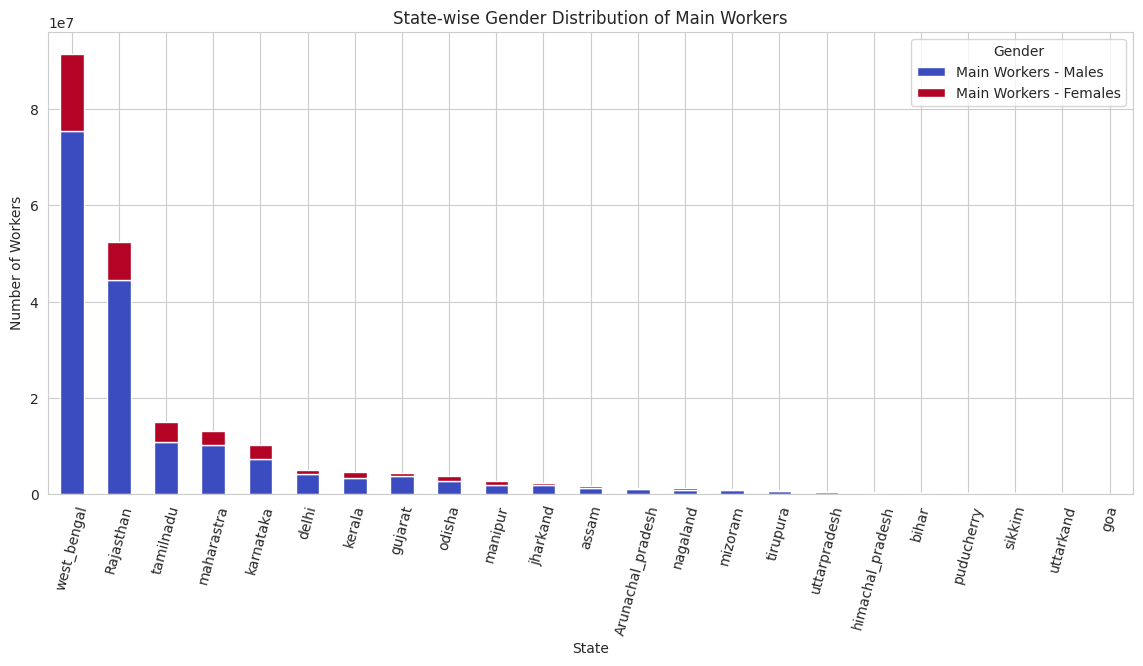

In [ ]:
# Visualization: Stacked Bar Chart
plt.figure(figsize=(14, 6))
ax = statewise_gender_summary.set_index("STATE")[["Main Workers - Males", "Main Workers - Females"]].plot(
    kind="bar", stacked=True, figsize=(14, 6), colormap="coolwarm"
)
plt.xticks(rotation=75)
plt.title("State-wise Gender Distribution of Main Workers")
plt.xlabel("State")
plt.ylabel("Number of Workers")
plt.legend(title="Gender")
plt.show()

#**STATEWISE GENDER DISTRIBUTION OF MARGINAL WORKERS**

In [ ]:
 #Aggregate data for state-wise gender distribution (Marginal Workers)
statewise_marginal_workers = df.groupby("STATE")[
    ["Marginal Workers - Total - Males", "Marginal Workers - Total - Females"]
].sum().reset_index()
statewise_marginal_workers.columns = ["STATE", "Marginal Workers - Males", "Marginal Workers - Females"]

# Sorting states by total marginal workers in ascending order
statewise_marginal_workers["Total Workers"] = statewise_marginal_workers["Marginal Workers - Males"] + statewise_marginal_workers["Marginal Workers - Females"]
statewise_marginal_workers = statewise_marginal_workers.sort_values(by="Total Workers", ascending=False)

statewise_marginal_workers


,STATE,Marginal Workers - Males,Marginal Workers - Females,Total Workers
22,west_bengal,10629060,8612572,19241632
1,Rajasthan,5851674,6866934,12718608
15,odisha,1094454,1258466,2352920
18,tamilnadu,1302562,941524,2244086
9,karnataka,1080324,755878,1836202
11,maharastra,947238,500434,1447672
10,kerala,696648,667350,1363998
8,jharkand,799858,400530,1200388
12,manipur,264908,454688,719596
2,assam,255214,334098,589312


<Figure size 1400x600 with 0 Axes>

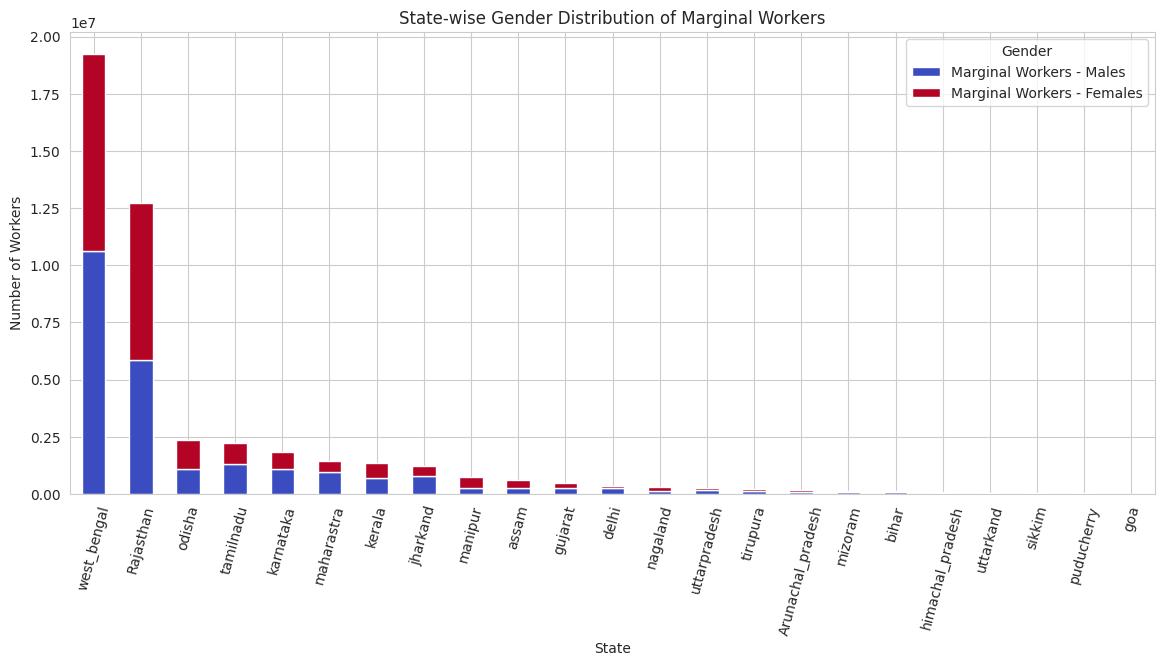

In [ ]:
# Visualization: Stacked Bar Chart for Marginal Workers
plt.figure(figsize=(14, 6))
ax = statewise_marginal_workers.set_index("STATE")[["Marginal Workers - Males", "Marginal Workers - Females"]].plot(
    kind="bar", stacked=True, figsize=(14, 6), colormap="coolwarm"
)
plt.xticks(rotation=75)
plt.title("State-wise Gender Distribution of Marginal Workers")
plt.xlabel("State")
plt.ylabel("Number of Workers")
plt.legend(title="Gender")
plt.show()


#**COMPARISION OF MAIN AND MARGINAL WORKERS**

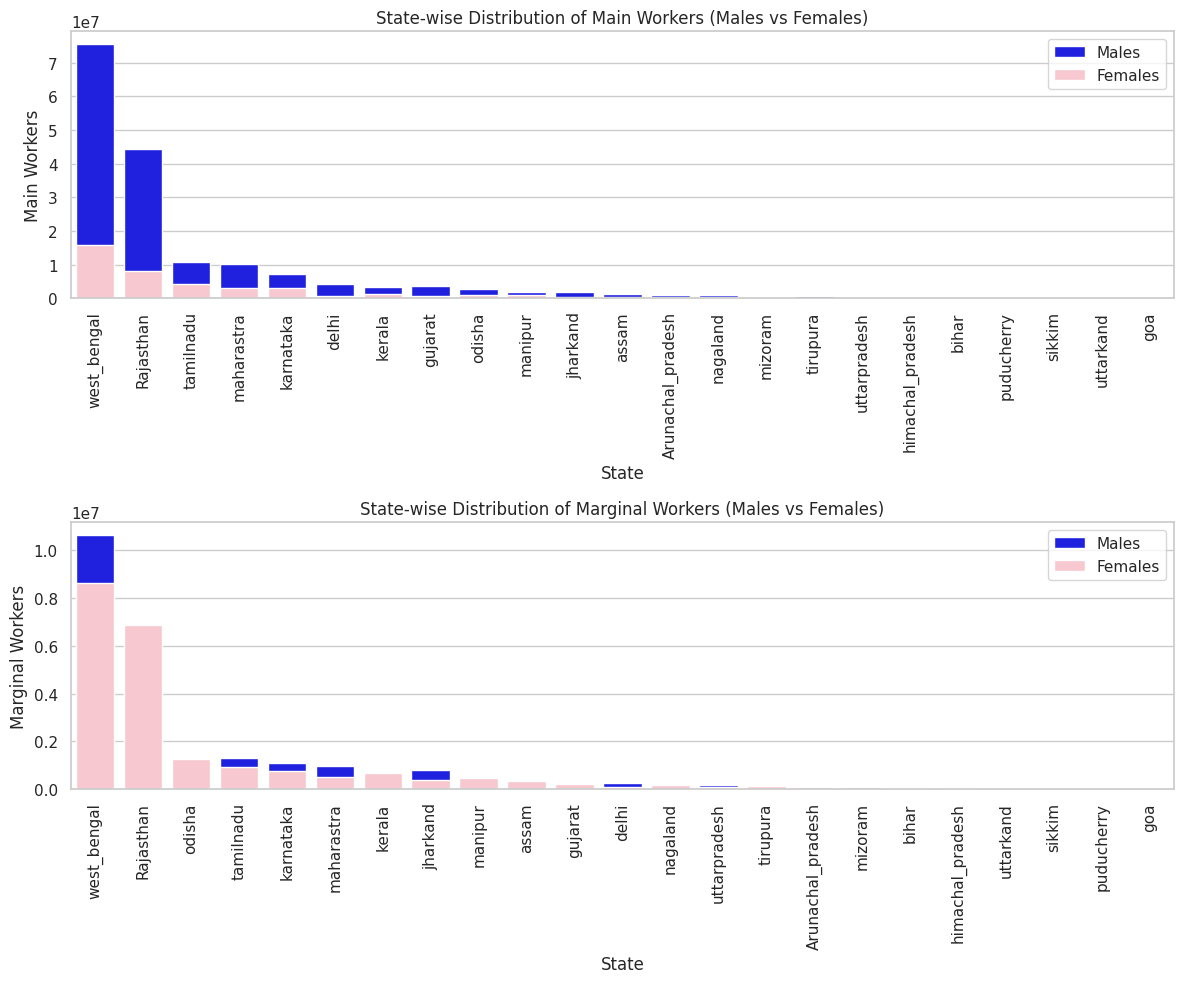

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot for main workers
sns.barplot(x="STATE", y="Main Workers - Males", data=statewise_gender_summary, ax=ax[0], color="blue", label="Males")
sns.barplot(x="STATE", y="Main Workers - Females", data=statewise_gender_summary, ax=ax[0], color="pink", label="Females")
ax[0].set_title('State-wise Distribution of Main Workers (Males vs Females)')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Main Workers')
ax[0].tick_params(axis="x", rotation=90)
ax[0].legend()

# Plot for marginal workers
sns.barplot(x="STATE", y="Marginal Workers - Males", data=statewise_marginal_workers, ax=ax[1], color="blue", label="Males")
sns.barplot(x="STATE", y="Marginal Workers - Females", data=statewise_marginal_workers, ax=ax[1], color="pink", label="Females")
ax[1].set_title('State-wise Distribution of Marginal Workers (Males vs Females)')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Marginal Workers')
ax[1].tick_params(axis="x", rotation=90)
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


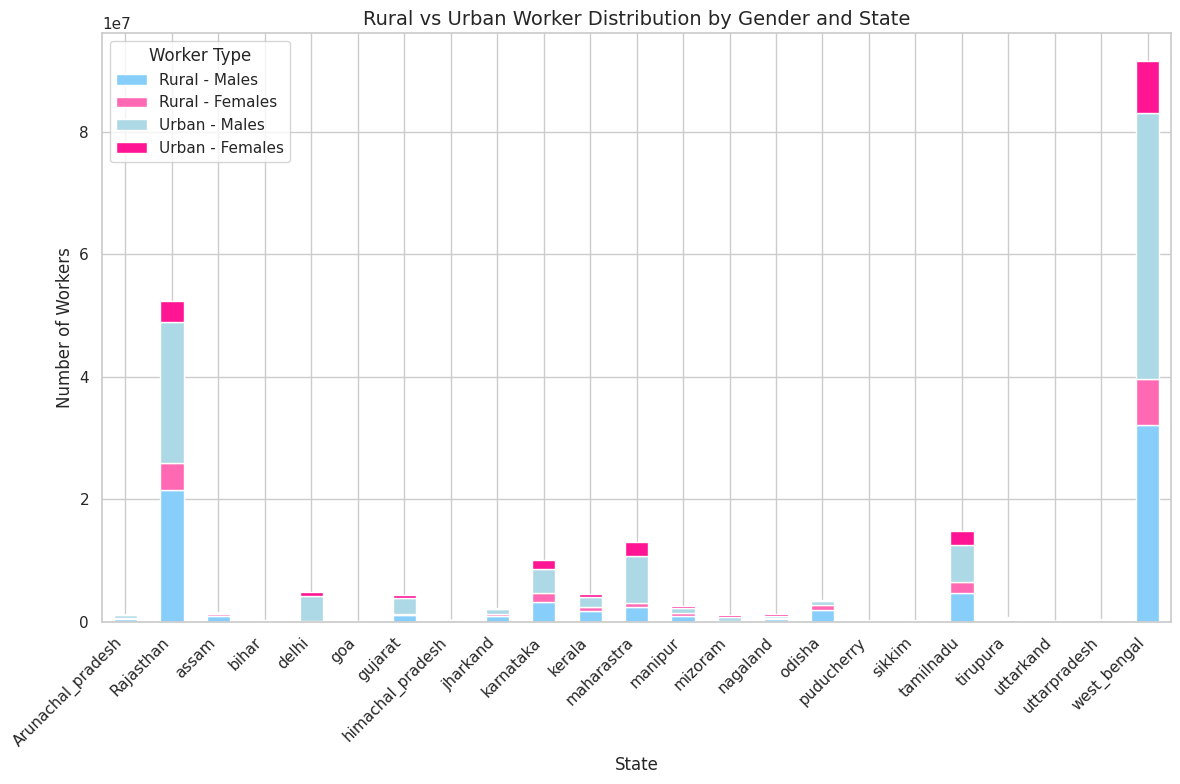

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by State and sum up the workers' counts by gender and location (Rural vs Urban)
state_gender_worker_data = df.groupby('STATE').agg({
    'Main Workers - Rural - Males': 'sum',
    'Main Workers - Rural - Females': 'sum',
    'Main Workers - Urban - Males': 'sum',
    'Main Workers - Urban - Females': 'sum'
}).reset_index()

# Create new columns to represent total rural and urban workers by gender
state_gender_worker_data['Rural - Males'] = state_gender_worker_data['Main Workers - Rural - Males']
state_gender_worker_data['Rural - Females'] = state_gender_worker_data['Main Workers - Rural - Females']
state_gender_worker_data['Urban - Males'] = state_gender_worker_data['Main Workers - Urban - Males']
state_gender_worker_data['Urban - Females'] = state_gender_worker_data['Main Workers - Urban - Females']

# Set 'State' as the index for better visualization
state_gender_worker_data.set_index('STATE', inplace=True)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
state_gender_worker_data[['Rural - Males', 'Rural - Females', 'Urban - Males', 'Urban - Females']].plot(
    kind='bar', stacked=True, ax=ax, color=['#87CEFA', '#FF69B4', '#ADD8E6', '#FF1493'])

# Title and labels
ax.set_title('Rural vs Urban Worker Distribution by Gender and State', fontsize=14)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Workers', fontsize=12)
ax.legend(title='Worker Type', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


#**RURAL VS URBAN WORKERS BY STATE AND GENDER**

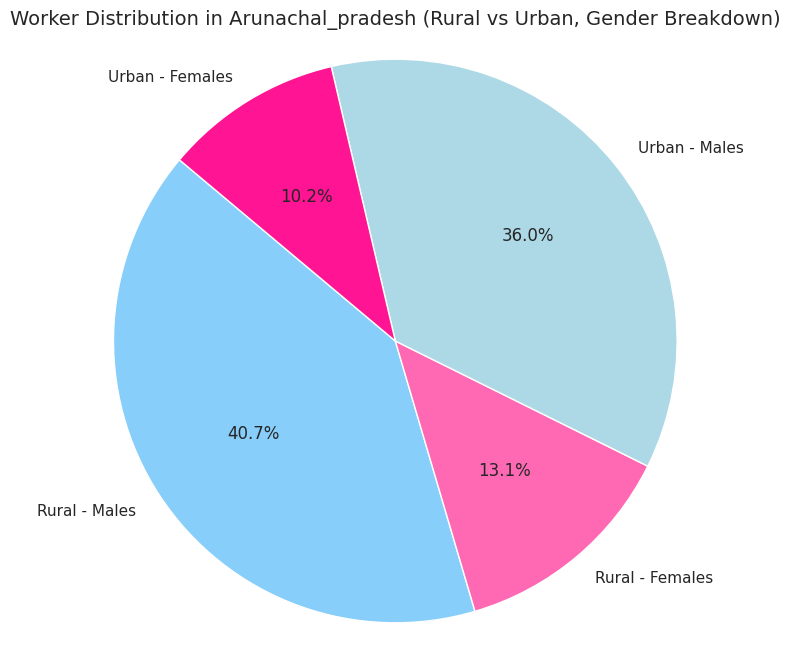

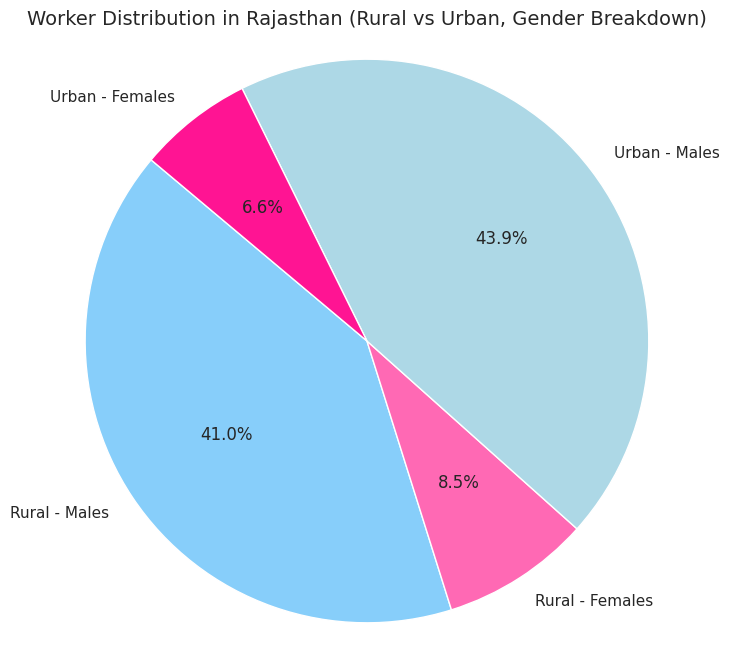

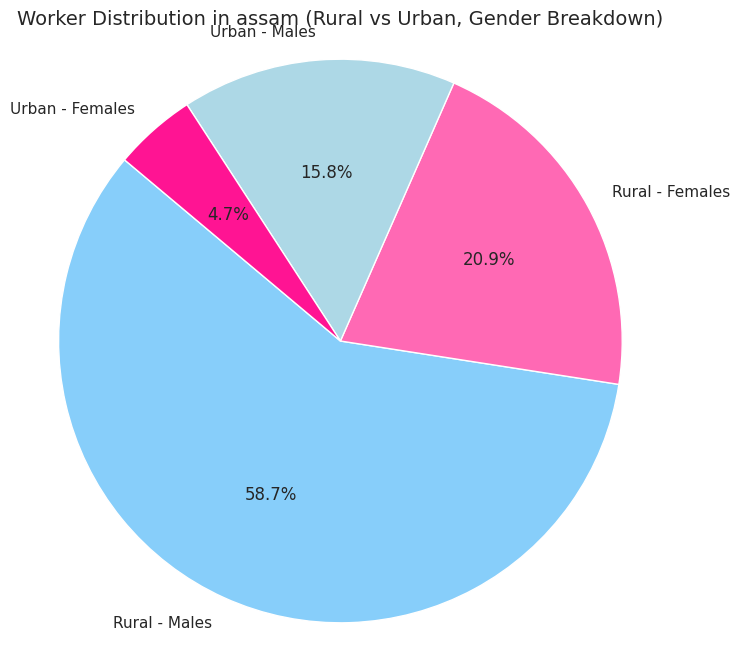

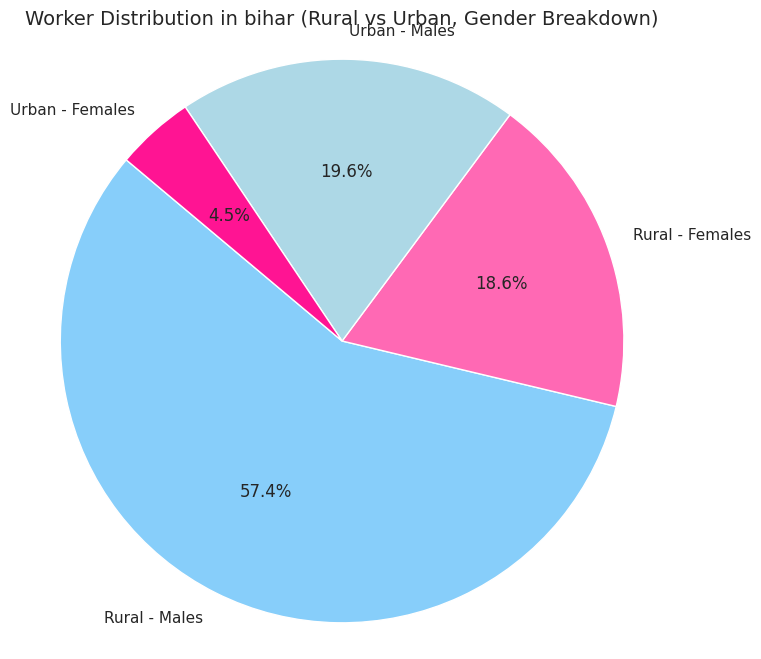

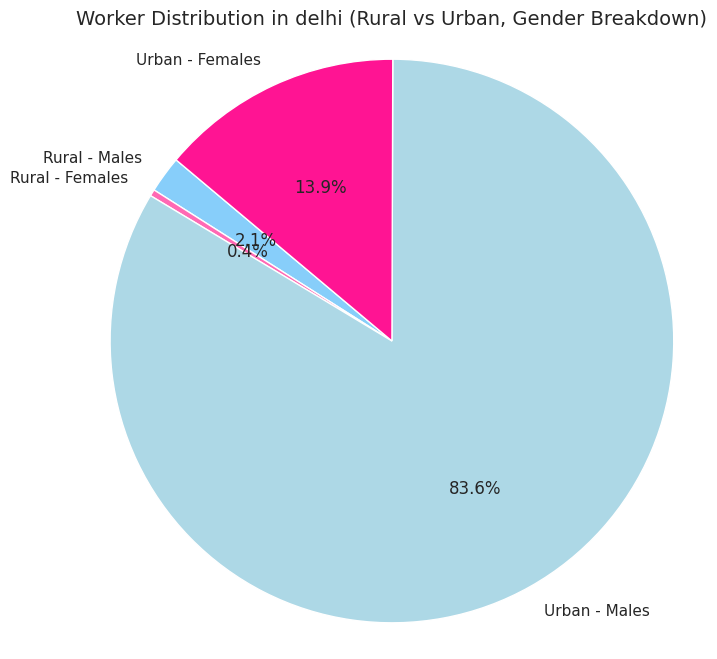

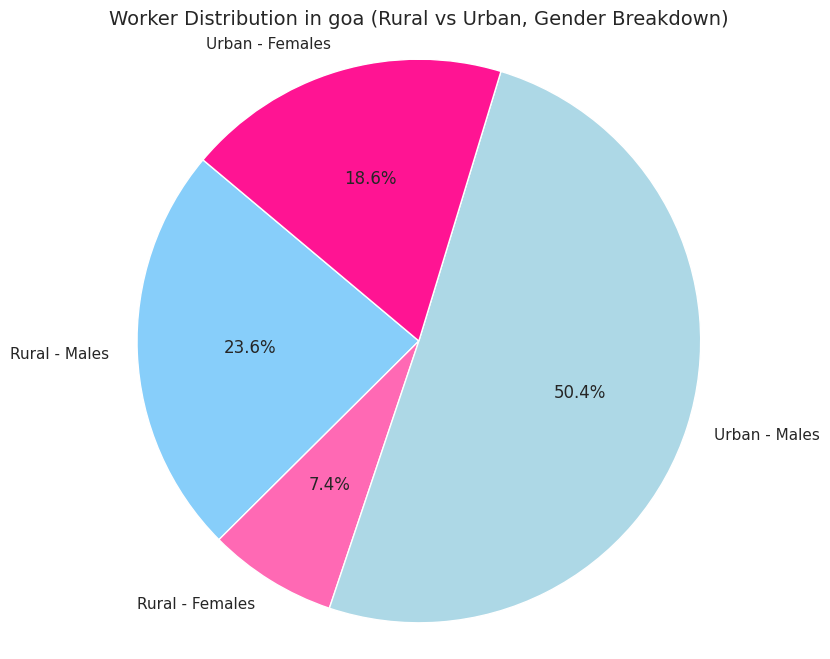

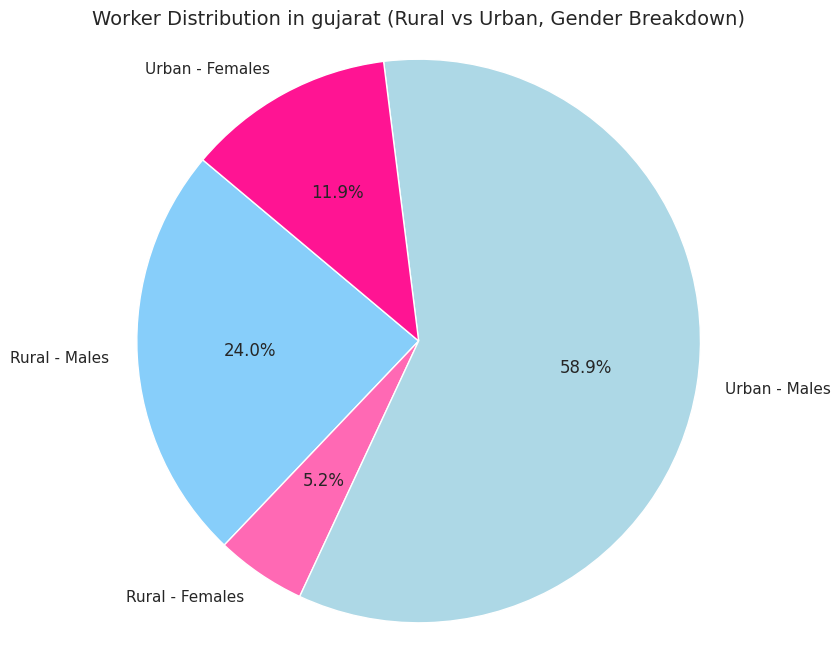

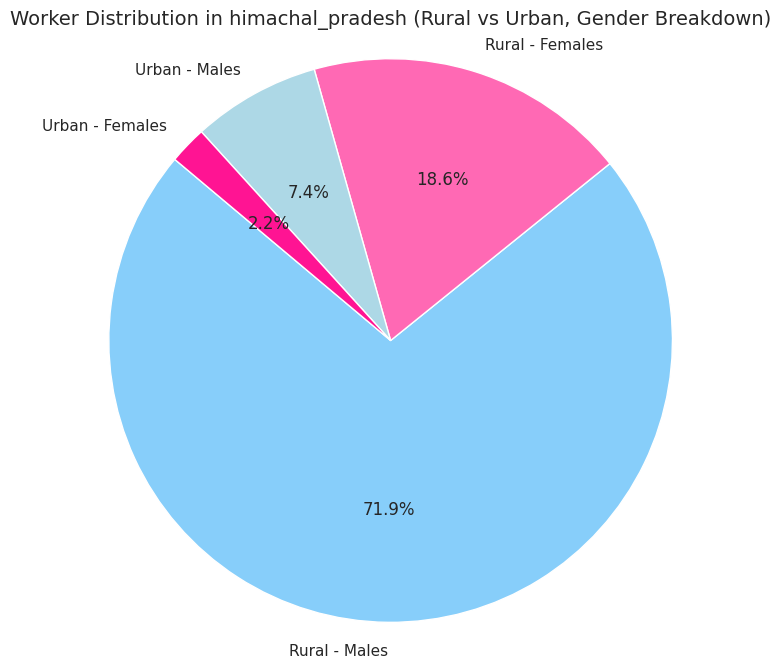

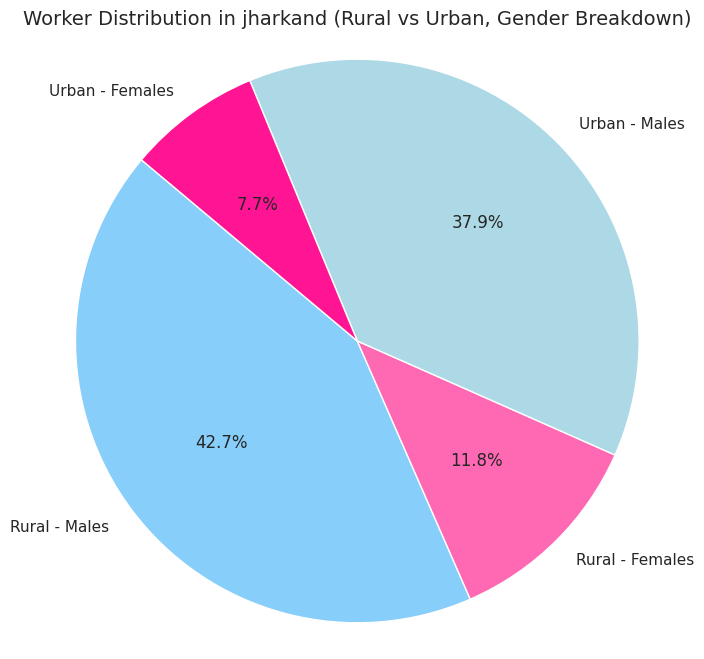

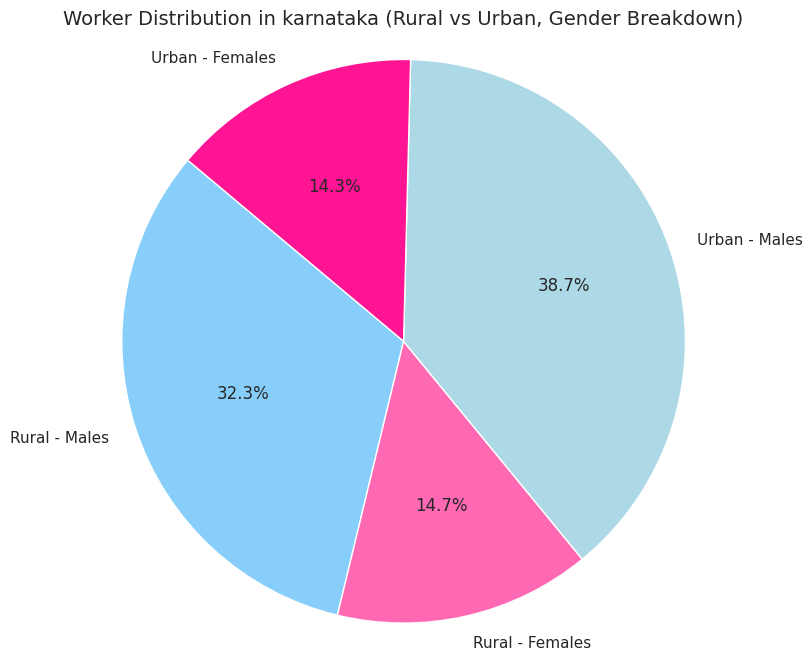

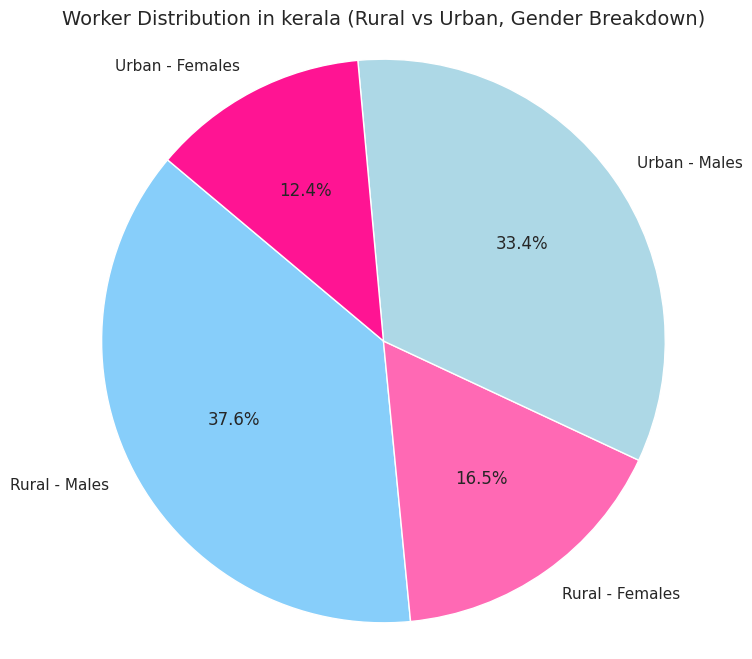

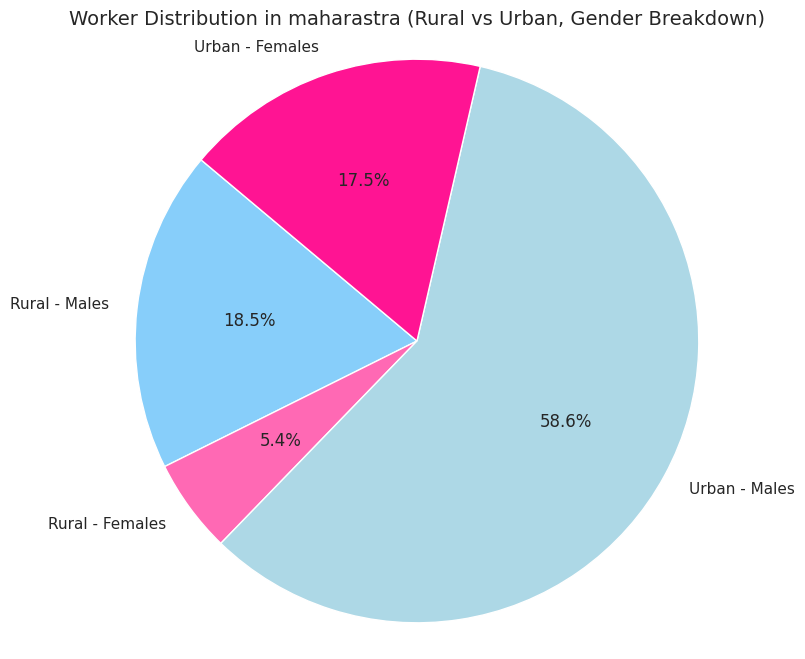

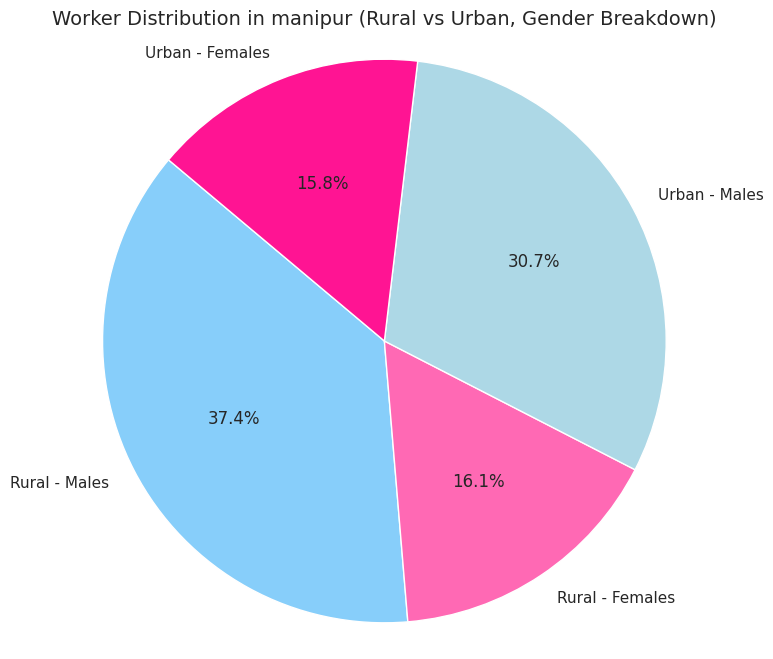

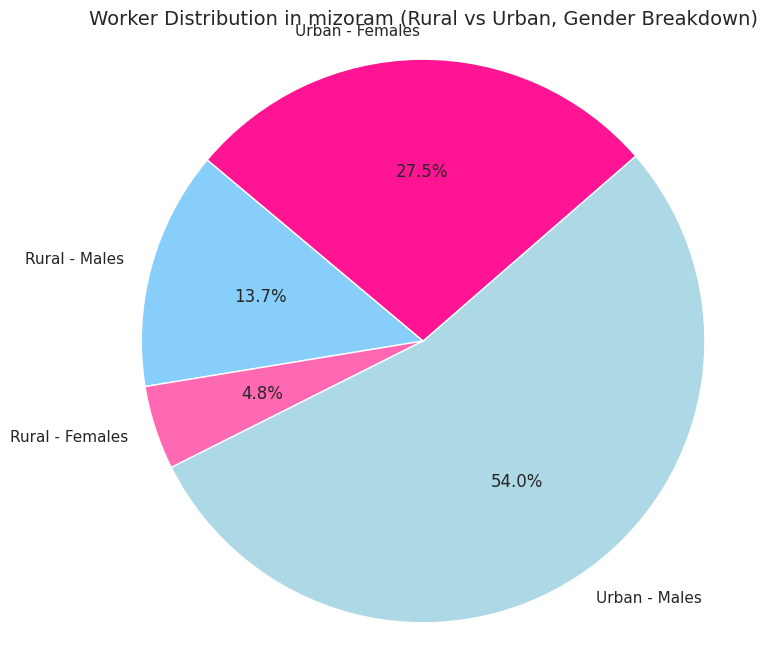

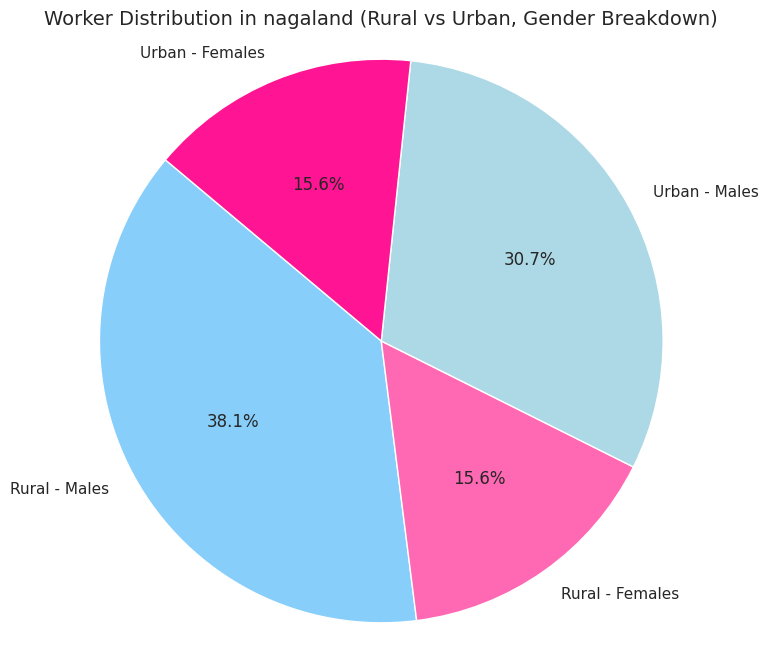

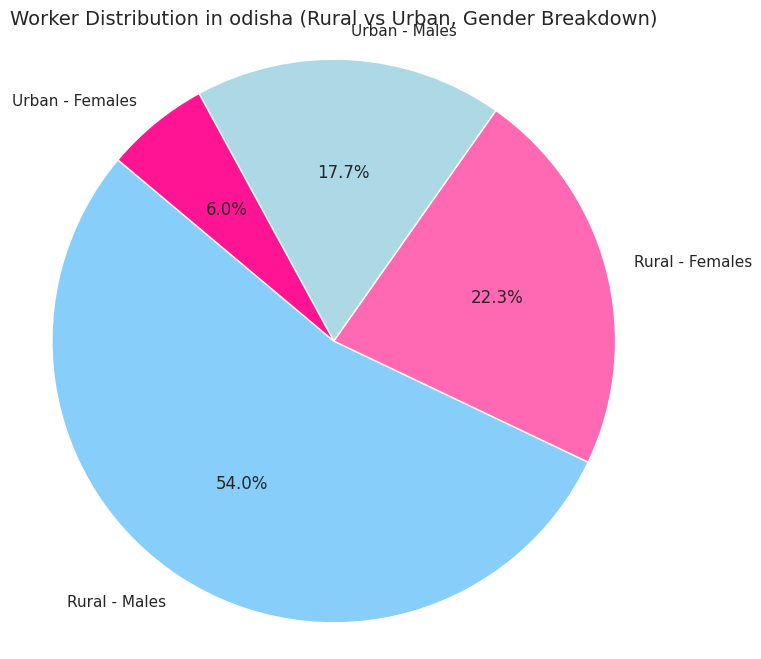

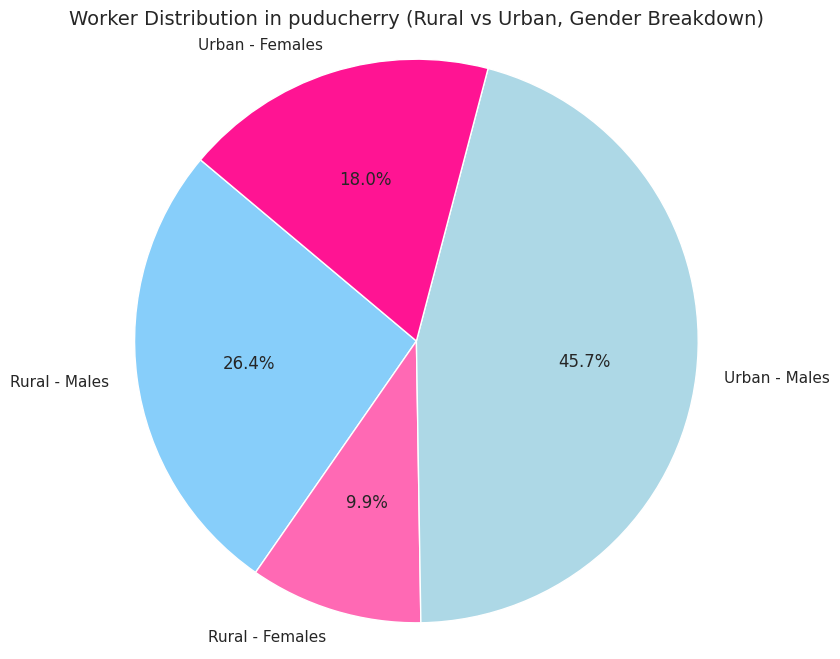

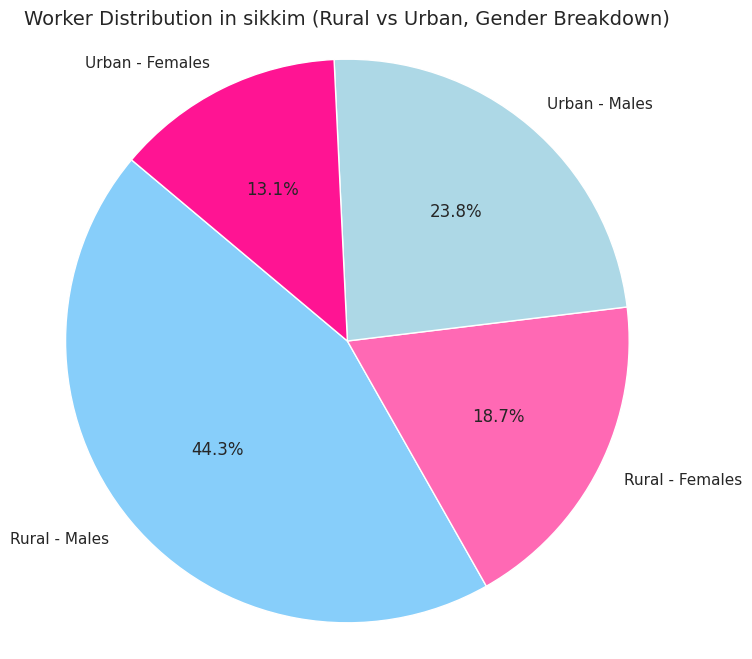

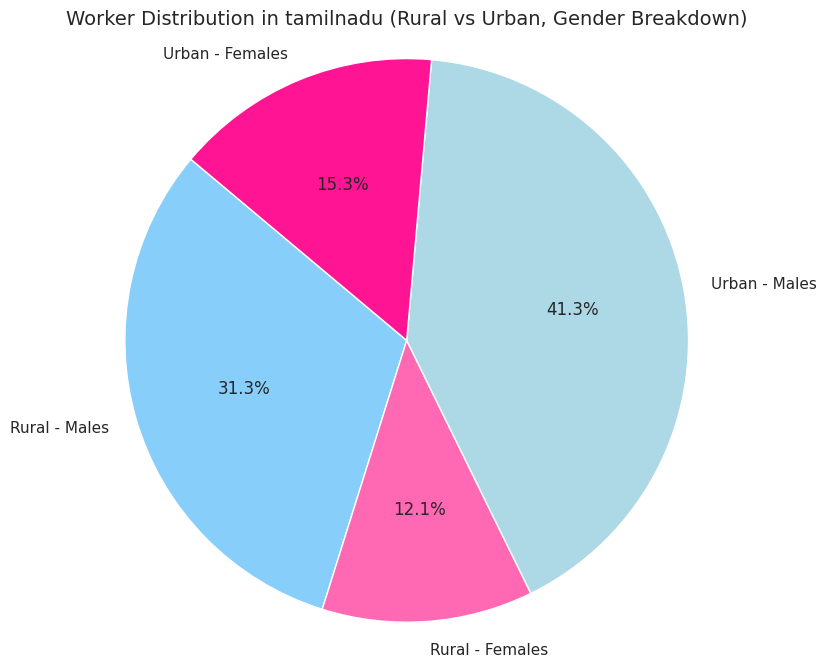

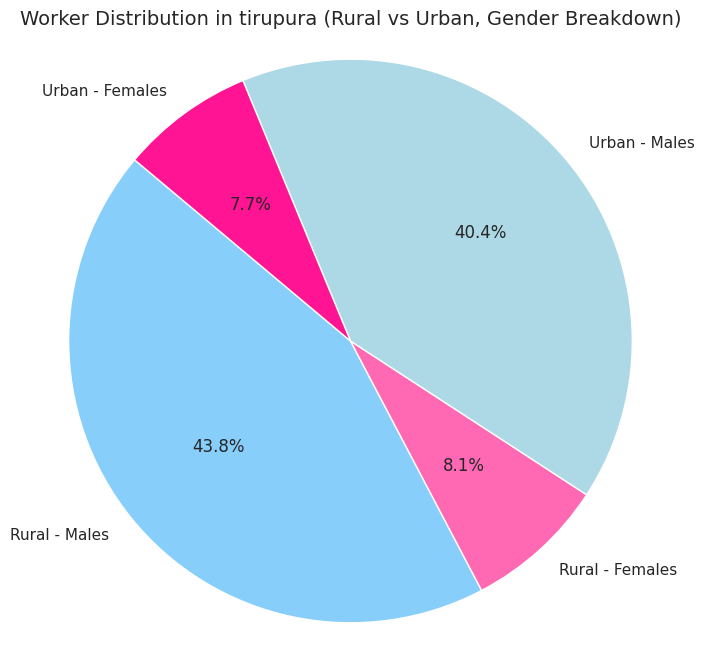

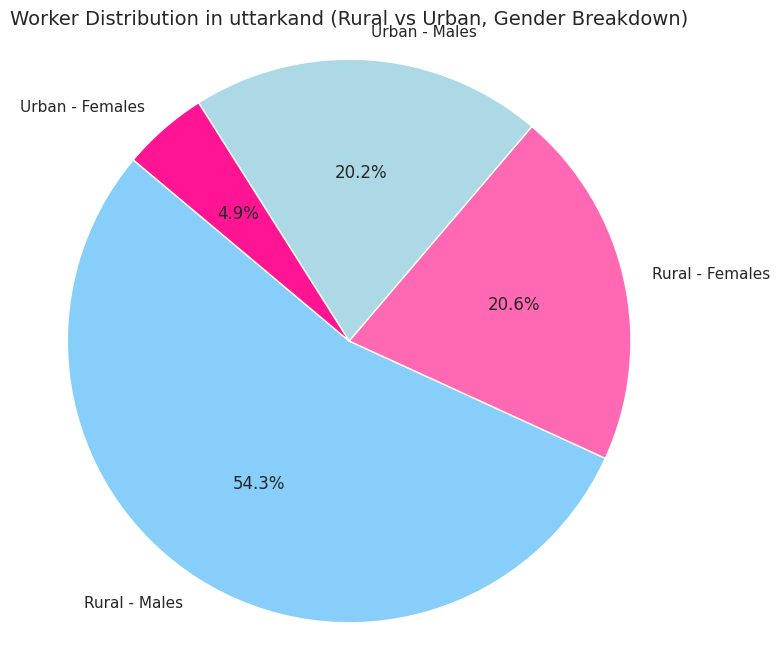

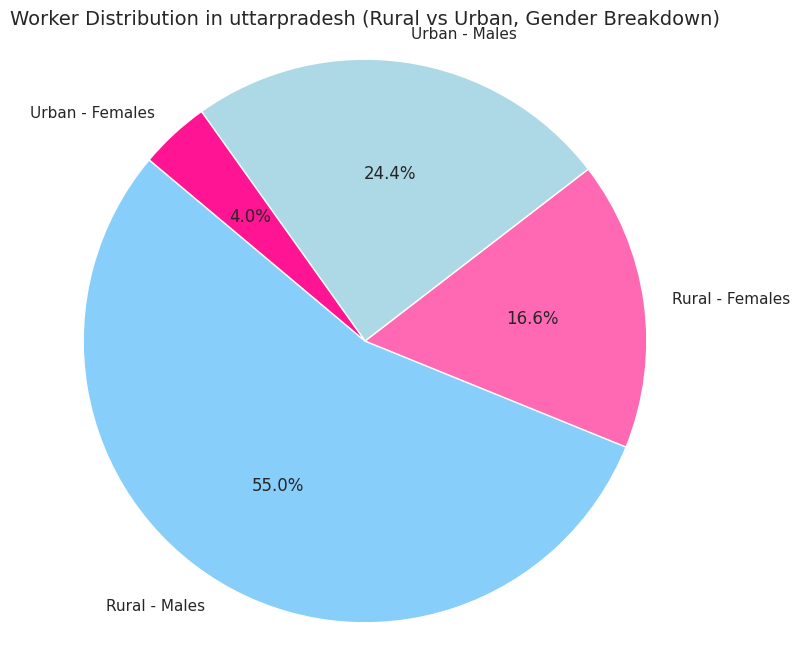

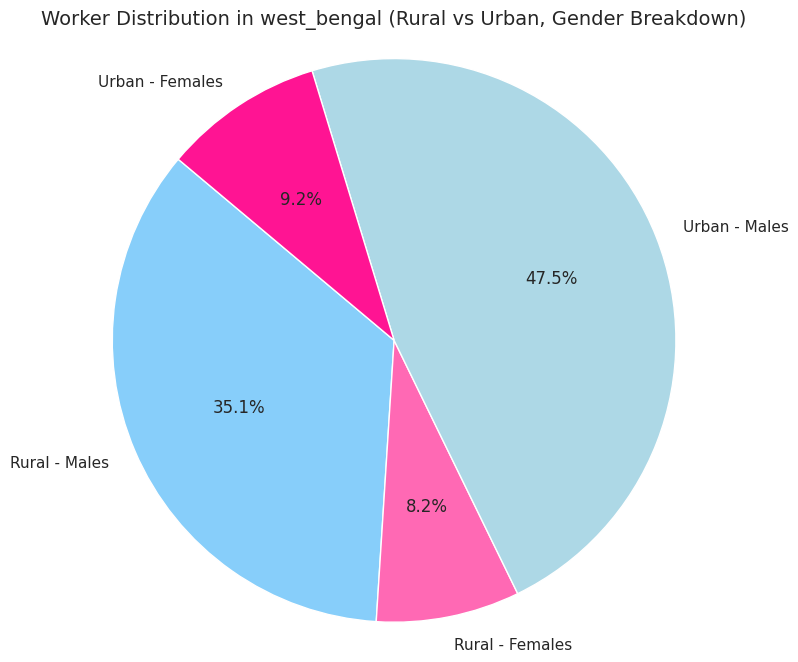

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by State and sum up the workers' counts by gender and location (Rural vs Urban)
state_gender_worker_data = df.groupby('STATE').agg({
    'Main Workers - Rural - Males': 'sum',
    'Main Workers - Rural - Females': 'sum',
    'Main Workers - Urban - Males': 'sum',
    'Main Workers - Urban - Females': 'sum'
}).reset_index()

# Loop through each state and plot a pie chart for the rural vs urban distribution
for state in state_gender_worker_data['STATE']:
    # Filter data for the current state
    state_data = state_gender_worker_data[state_gender_worker_data['STATE'] == state]

    # Data for the pie chart
    rural_males = state_data['Main Workers - Rural - Males'].values[0]
    rural_females = state_data['Main Workers - Rural - Females'].values[0]
    urban_males = state_data['Main Workers - Urban - Males'].values[0]
    urban_females = state_data['Main Workers - Urban - Females'].values[0]

    # Total workers for the current state
    total_rural = rural_males + rural_females
    total_urban = urban_males + urban_females

    # Data to plot
    labels = ['Rural - Males', 'Rural - Females', 'Urban - Males', 'Urban - Females']
    sizes = [rural_males, rural_females, urban_males, urban_females]
    colors = ['#87CEFA', '#FF69B4', '#ADD8E6', '#FF1493']

    # Plotting the pie chart for the current state
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Worker Distribution in {state} (Rural vs Urban, Gender Breakdown)', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


#**INDUSTRY CLASSIFIACATION WITH MAIN WORKERS**

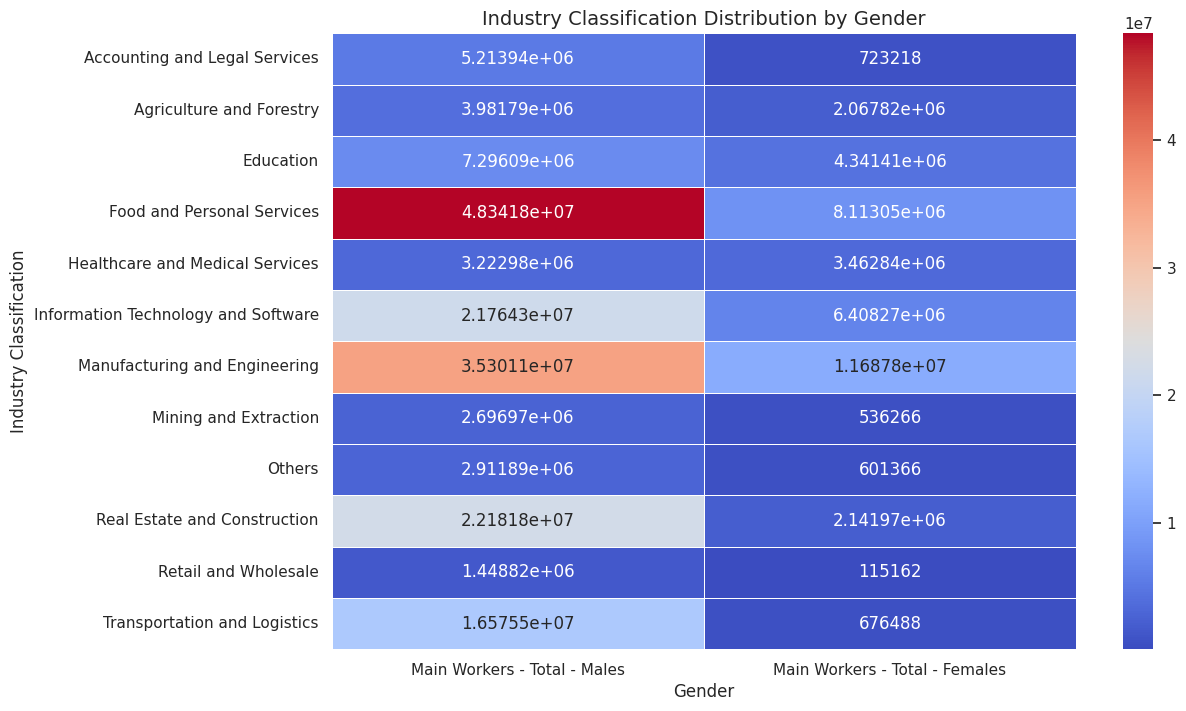

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by Industry Classification and Gender (Main Workers - Males and Main Workers - Females)
industry_gender_data = df.groupby('Industry Classification').agg({
    'Main Workers - Total - Males': 'sum',
    'Main Workers - Total - Females': 'sum'
}).reset_index()

# Set the 'Industry Classification' column as the index for better visualization
industry_gender_data.set_index('Industry Classification', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(industry_gender_data, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)
plt.title('Industry Classification Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Industry Classification', fontsize=12)
plt.show()


#**INDUSTRY CLASSIFIACATION WITH MAIN WORKERS**

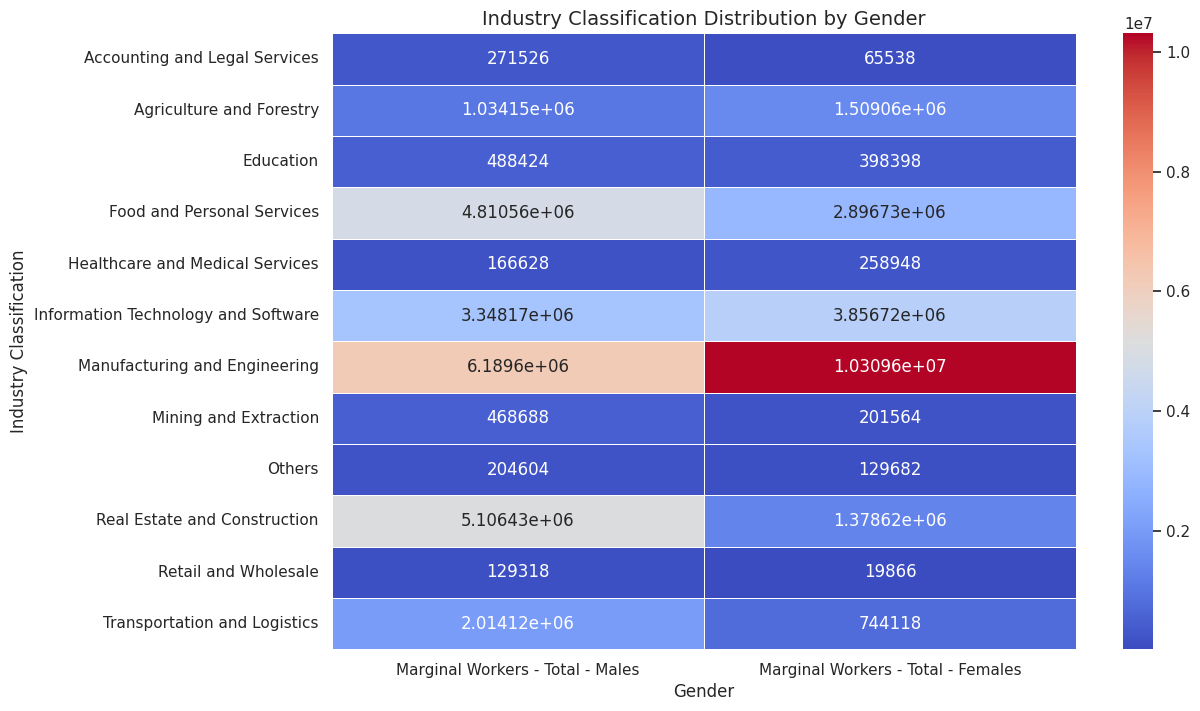

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by Industry Classification and Gender (Marginal Workers - Males and Marginal Workers - Females)
industry_gender_data = df.groupby('Industry Classification').agg({
    'Marginal Workers - Total - Males': 'sum',
    'Marginal Workers - Total - Females': 'sum'
}).reset_index()

# Set the 'Industry Classification' column as the index for better visualization
industry_gender_data.set_index('Industry Classification', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(industry_gender_data, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)
plt.title('Industry Classification Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Industry Classification', fontsize=12)
plt.show()


In [ ]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'DISTRICT',
       'Cleaned_NIC_Name', 'Cluster', 'Industry Classification'],
      dtype='object')

#** COMPARISION OF DIVISION AND STATE WITH MAIN WORKERS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by STATE and Division, and sum the number of workers in each group
state_division_worker_data = df.groupby(['STATE', 'Division']).agg({
    'Main Workers - Total -  Persons': 'sum'
}).reset_index()

# Find the top 20 divisions by total number of workers across all states
top_20_divisions = state_division_worker_data.groupby('Division')['Main Workers - Total -  Persons'].sum().nlargest(20).index

# Filter the data to include only the top 20 divisions
top_20_data = state_division_worker_data[state_division_worker_data['Division'].isin(top_20_divisions)]

# Pivot the data to have STATE as index and Division as columns
pivot_data = top_20_data.pivot(index='STATE', columns='Division', values='Main Workers - Total -  Persons')
pivot_data



Division,`01,`10,`12,`13,`14,`23,`24,`32,`41,`43,`46,`47,`49,`82,`84,`85,`86,`96,`97,`99
STATE,,,,,,,,,,,,,,,,,,,,
Arunachal_pradesh,77802.0,8106.0,6.0,4650.0,5262.0,576.0,2124.0,1614.0,55206.0,16638.0,5220.0,94338.0,34158.0,19404.0,323112.0,135288.0,57018.0,14412.0,15018.0,19312.0
Rajasthan,2704596.0,1196880.0,199944.0,1171272.0,1253268.0,1666206.0,256974.0,1514646.0,6415782.0,703248.0,1399914.0,7096206.0,3680160.0,1201716.0,2976720.0,3898236.0,1195746.0,1139184.0,222342.0,855748.0
assam,119784.0,31554.0,228.0,48714.0,4716.0,8148.0,5196.0,1800.0,60336.0,56790.0,10308.0,142590.0,123156.0,46722.0,164838.0,235884.0,87000.0,9534.0,9180.0,88372.0
bihar,5880.0,8652.0,3180.0,3000.0,3294.0,7704.0,1152.0,1506.0,21330.0,13686.0,924.0,18306.0,21666.0,3594.0,24048.0,26970.0,10206.0,4392.0,168.0,21764.0
delhi,8904.0,33270.0,882.0,41772.0,226650.0,10362.0,42996.0,119028.0,481764.0,110268.0,118650.0,594006.0,383214.0,323802.0,615180.0,167190.0,123126.0,151368.0,218142.0,27180.0
goa,72.0,612.0,NaN,90.0,324.0,216.0,18.0,1206.0,2112.0,2202.0,534.0,3744.0,3372.0,2388.0,7848.0,1476.0,1290.0,1566.0,NaN,716.0
gujarat,85524.0,45342.0,1626.0,170622.0,77508.0,91440.0,43812.0,352590.0,568002.0,269544.0,50820.0,243534.0,277026.0,10674.0,222324.0,221262.0,207582.0,67902.0,8964.0,126864.0
himachal_pradesh,33180.0,8466.0,210.0,2718.0,2694.0,600.0,570.0,5418.0,21474.0,3444.0,1470.0,18030.0,22194.0,4194.0,33726.0,43806.0,10302.0,756.0,1026.0,15616.0
jharkand,22926.0,15858.0,37464.0,9966.0,4428.0,92202.0,66708.0,37914.0,345936.0,13782.0,5700.0,118584.0,168420.0,18354.0,57948.0,109020.0,40770.0,99228.0,32850.0,39810.0


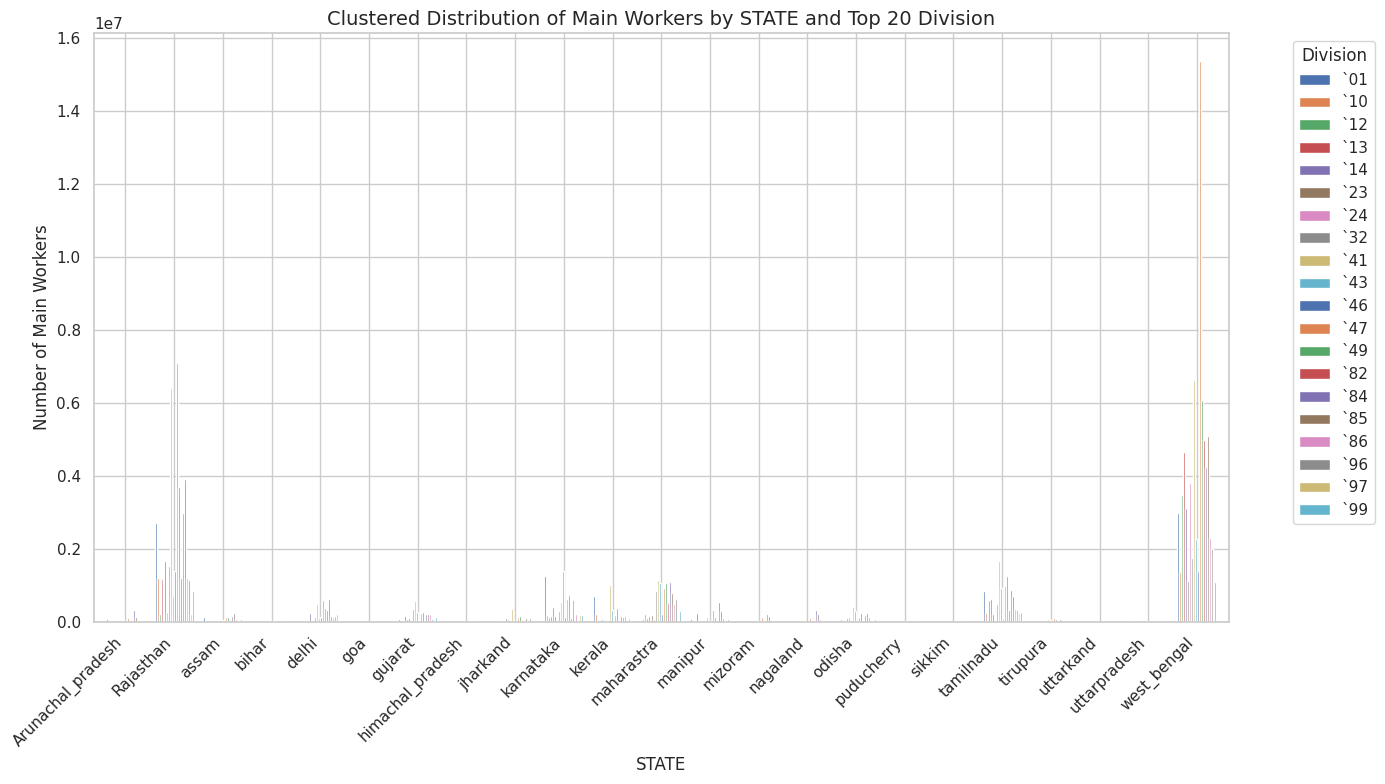

In [ ]:
# Plotting the clustered bar chart with thicker lines
pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8, linewidth=1)

# Title and labels
plt.title('Clustered Distribution of Main Workers by STATE and Top 20 Division', fontsize=14)
plt.xlabel('STATE', fontsize=12)
plt.ylabel('Number of Main Workers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#COMPARISION OF DIVISION AND STATE WITH MARGIANAL WORKERS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by STATE and Division, and sum the number of workers in each group
state_division_worker_data = df.groupby(['STATE', 'Division']).agg({
    'Marginal Workers - Total -  Persons': 'sum'
}).reset_index()

# Find the top 20 divisions by total number of workers across all states
top_20_divisions = state_division_worker_data.groupby('Division')['Marginal Workers - Total -  Persons'].sum().nlargest(20).index

# Filter the data to include only the top 20 divisions
top_20_data = state_division_worker_data[state_division_worker_data['Division'].isin(top_20_divisions)]

# Pivot the data to have STATE as index and Division as columns
pivot_data = top_20_data.pivot(index='STATE', columns='Division', values='Marginal Workers - Total -  Persons')
pivot_data

Division,`01,`08,`10,`12,`13,`14,`16,`23,`24,`32,`41,`42,`43,`47,`49,`82,`85,`96,`97,`99
STATE,,,,,,,,,,,,,,,,,,,,
Arunachal_pradesh,17850.0,588.0,2244.0,6.0,2868.0,702.0,2598.0,96.0,174.0,264.0,10350.0,13572.0,5268.0,12720.0,3552.0,3774.0,8196.0,2352.0,5694.0,34184.0
Rajasthan,2452368.0,220488.0,489306.0,47526.0,326046.0,316626.0,92850.0,426504.0,21996.0,143682.0,1980900.0,2573922.0,171846.0,629322.0,325500.0,64224.0,239586.0,201570.0,99864.0,564006.0
assam,79908.0,6480.0,27162.0,60.0,95532.0,2376.0,11028.0,4548.0,4008.0,744.0,23850.0,21036.0,30834.0,30306.0,17004.0,8418.0,20118.0,3312.0,5802.0,135100.0
bihar,4614.0,1272.0,6984.0,2652.0,3714.0,1236.0,15240.0,10356.0,330.0,1080.0,13056.0,7272.0,14238.0,5670.0,2844.0,744.0,2370.0,2994.0,114.0,32374.0
delhi,1344.0,18.0,2982.0,120.0,4980.0,14796.0,1038.0,1182.0,1896.0,10392.0,75480.0,1752.0,13122.0,32736.0,19404.0,17034.0,8286.0,9744.0,23190.0,14558.0
goa,54.0,288.0,114.0,NaN,0.0,150.0,1104.0,18.0,48.0,462.0,990.0,552.0,654.0,714.0,408.0,216.0,120.0,522.0,NaN,620.0
gujarat,59568.0,1644.0,6612.0,90.0,18690.0,10548.0,21498.0,8208.0,2154.0,26082.0,64806.0,2694.0,43008.0,18360.0,15222.0,1008.0,9858.0,12876.0,1080.0,53632.0
himachal_pradesh,13014.0,252.0,5694.0,12.0,2304.0,1080.0,636.0,132.0,36.0,540.0,10932.0,20490.0,1614.0,2118.0,3336.0,450.0,1962.0,348.0,882.0,14992.0
jharkand,39294.0,30834.0,13944.0,23334.0,20328.0,1572.0,97176.0,131124.0,11178.0,12894.0,259872.0,184824.0,6132.0,42354.0,51150.0,1254.0,10656.0,29106.0,46662.0,54946.0


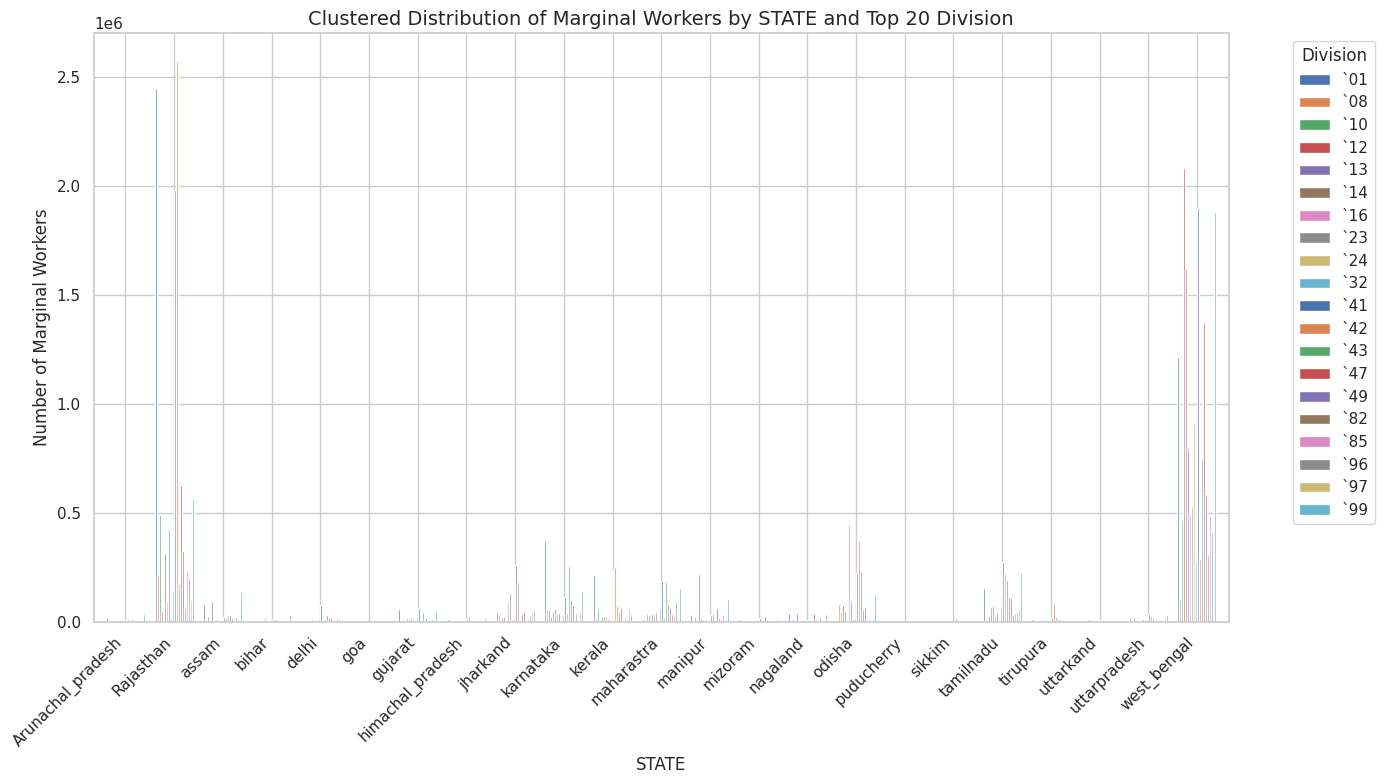

In [ ]:
# Plotting the clustered bar chart with thicker lines
pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8, linewidth=1)

# Title and labels
plt.title('Clustered Distribution of Marginal Workers by STATE and Top 20 Division', fontsize=14)
plt.xlabel('STATE', fontsize=12)
plt.ylabel('Number of Marginal Workers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#**COMPARISION OF DIVISION AND STATE AND INDUSTRTY CLASSIFICATION WITH MARGIANAL WORKERS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by STATE, Division, and Industry Classification, and sum the number of marginal workers
state_division_worker_data = df.groupby(['STATE', 'Division', 'Industry Classification']).agg({
    'Marginal Workers - Total -  Persons': 'sum'
}).reset_index()

# Find the top 20 divisions by total number of marginal workers across all states
top_20_divisions = state_division_worker_data.groupby('Division')['Marginal Workers - Total -  Persons'].sum().nlargest(20).index

# Filter the data to include only the top 20 divisions
top_20_data = state_division_worker_data[state_division_worker_data['Division'].isin(top_20_divisions)]

# Pivot the data to have STATE as index, Division as columns, and Industry Classification as a level
pivot_data = top_20_data.pivot_table(index='STATE', columns=['Division', 'Industry Classification'], values='Marginal Workers - Total -  Persons', aggfunc='sum')

pivot_data


Division                                     `01                             \
Industry Classification Agriculture and Forestry Food and Personal Services   
STATE                                                                         
Arunachal_pradesh                        10960.0                     6022.0   
Rajasthan                               892070.0                   818880.0   
assam                                    40220.0                    26644.0   
bihar                                     1978.0                     1542.0   
delhi                                      690.0                      448.0   
goa                                         18.0                       18.0   
gujarat                                  22706.0                    20840.0   
himachal_pradesh                          5092.0                     4338.0   
jharkand                                 19526.0                    13118.0   
karnataka                               198026.0                   123414.0   
kerala                                  132752.0                    71762.0   
maharastra                                4716.0                     4216.0   
manipur                                  19164.0                    10966.0   
mizoram                                   5864.0                     4524.0   
nagaland                                 17248.0                    14004.0   
odisha                                   49180.0                    46834.0   
puducherry                                 346.0                      366.0   
sikkim                                    1574.0                     1164.0   
tamilnadu                                67426.0                    52348.0   
tirupura                                  6100.0                     3912.0   
uttarkand                                 2888.0                     2046.0   
uttarpradesh                              6982.0                     5504.0   
west_bengal                             605096.0                   404922.0   

Division                                                                `08  \
Industry Classification Manufacturing and Engineering Mining and Extraction   
STATE                                                                         
Arunachal_pradesh                               868.0                 588.0   
Rajasthan                                    741418.0              220488.0   
assam                                         13044.0                6480.0   
bihar                                          1094.0                1272.0   
delhi                                           206.0                  18.0   
goa                                              18.0                 288.0   
gujarat                                       16022.0                1644.0   
himachal_pradesh                               3584.0                 252.0   
jharkand                                       6650.0               30834.0   
karnataka                                     48658.0               60204.0   
kerala                                        10700.0               17124.0   
maharastra                                     3704.0                4068.0   
manipur                                        2552.0                1968.0   
mizoram                                        3172.0                1302.0   
nagaland                                      10508.0                2532.0   
odisha                                        44392.0               79950.0   
puducherry                                      314.0                  12.0   
sikkim                                          754.0                 258.0   
tamilnadu                                     36922.0               14808.0   
tirupura                                       1724.0                 162.0   
uttarkand                                      1204.0                 216.0   
uttarpradesh                                   40

#**COMPARISION OF DIVISION AND STATE AND INDUSTRTY CLASSIFICATION WITH MAIN WORKERS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Group the data by STATE, Division, and Industry Classification, and sum the number of marginal workers
state_division_worker_data = df.groupby(['STATE', 'Division', 'Industry Classification']).agg({
    'Main Workers - Total -  Persons': 'sum'
}).reset_index()

# Find the top 20 divisions by total number of marginal workers across all states
top_20_divisions = state_division_worker_data.groupby('Division')['Main Workers - Total -  Persons'].sum().nlargest(20).index

# Filter the data to include only the top 20 divisions
top_20_data = state_division_worker_data[state_division_worker_data['Division'].isin(top_20_divisions)]

# Pivot the data to have STATE as index, Division as columns, and Industry Classification as a level
pivot_data = top_20_data.pivot_table(index='STATE', columns=['Division', 'Industry Classification'], values='Main Workers - Total -  Persons', aggfunc='sum')

pivot_data

Division                                     `01                             \
Industry Classification Agriculture and Forestry Food and Personal Services   
STATE                                                                         
Arunachal_pradesh                        47126.0                    25958.0   
Rajasthan                               989472.0                   904844.0   
assam                                    68272.0                    39928.0   
bihar                                     2766.0                     2024.0   
delhi                                     4062.0                     3052.0   
goa                                         30.0                       24.0   
gujarat                                  34416.0                    32660.0   
himachal_pradesh                         12038.0                    11068.0   
jharkand                                 10934.0                     7650.0   
karnataka                               739998.0                   416368.0   
kerala                                  440340.0                   231496.0   
maharastra                               25576.0                    22934.0   
manipur                                  40678.0                    24524.0   
mizoram                                  20196.0                    13850.0   
nagaland                                 24994.0                    18516.0   
odisha                                   40054.0                    37826.0   
puducherry                                1472.0                     1260.0   
sikkim                                    4000.0                     2628.0   
tamilnadu                               428530.0                   280078.0   
tirupura                                 27092.0                    14992.0   
uttarkand                                 2840.0                     1976.0   
uttarpradesh                              5868.0                     4436.0   
west_bengal                            1738122.0                   995062.0   

Division                                               \
Industry Classification Manufacturing and Engineering   
STATE                                                   
Arunachal_pradesh                              4718.0   
Rajasthan                                    810280.0   
assam                                         11584.0   
bihar                                          1090.0   
delhi                                          1790.0   
goa                                              18.0   
gujarat                                       18448.0   
himachal_pradesh                              10074.0   
jharkand                                       4342.0   
karnataka                                     92630.0   
kerala                                        22292.0   
maharastra                                    20172.0   
manipur                                        8238.0   
mizoram                                        7492.0   
nagaland                                      11990.0   
odisha                                        35466.0   
puducherry                                     1048.0   
sikkim                                         1256.0   
tamilnadu                                    129514.0   
tirupura                                       2892.0   
uttarkand                                      1112.0   
uttarpradesh                                   3004.0   
west_bengal                                  250010.0   

Division                                       `10  \
Industry Classification Food and Personal Services   
STATE                                                
Arunachal_pradesh                           4480.0   
Rajasthan                                 629532.0   
assam                                      12714.0   
bihar                                       4880.0   
delhi                                      17896.0   
goa                           

In [ ]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'DISTRICT',
       'Cleaned_NIC_Name', 'Cluster', 'Industry Classification'],
      dtype='object')

#**6)WORKFORCE ANALYSIS**

In [15]:
# Calculate total workforce (Main + Marginal)
df["Total_Workforce"] = df["Main Workers - Total -  Persons"] + df["Marginal Workers - Total -  Persons"]

# Aggregate workforce by state, district, and industry
industry_distribution = df.groupby(["STATE", "DISTRICT", "Industry Classification"])["Total_Workforce"].sum().reset_index()

# Pivot table for clustering
pivot_table = industry_distribution.pivot_table(index=["STATE", "DISTRICT"], columns="Industry Classification", values="Total_Workforce", fill_value=0)
pivot_table





Industry Classification                       Accounting and Legal Services  \
STATE             DISTRICT                                                    
Arunachal_pradesh Anjaw                                                43.0   
                  Changlang                                           380.0   
                  Dibang Valley                                        61.0   
                  East Kameng                                         217.0   
                  East Siang                                          695.0   
...                                                                     ...   
west_bengal       Purba Medinipur                                   52090.0   
                  Puruliya                                          14402.0   
                  South Twenty Four Parganas                       129845.0   
                  Unknown                                         1631150.0   
                  Uttar Dinajpur                                    11632.0   

Industry Classification                       Agriculture and Forestry  \
STATE             DISTRICT                                               
Arunachal_pradesh Anjaw                                           33.0   
                  Changlang                                     7542.0   
                  Dibang Valley                                  236.0   
                  East Kameng                                    922.0   
                  East Siang                                    2731.0   
...                                                                ...   
west_bengal       Purba Medinipur                              75509.0   
                  Puruliya                                     34770.0   
                  South Twenty Four Parganas                  167057.0   
                  Unknown                                    1688756.0   
                  Uttar Dinajpur                               68040.0   

Industry Classification                       Education  \
STATE             DISTRICT                                
Arunachal_pradesh Anjaw                           805.0   
                  Changlang                      4779.0   
                  Dibang Valley                   516.0   
                  East Kameng                    3385.0   
                  East Siang                     7048.0   
...                                                 ...   
west_bengal       Purba Medinipur              141090.0   
                  Puruliya                      63518.0   
                  South Twenty Four Parganas   165314.0   
                  Unknown                     2396439.0   
                  Uttar Dinajpur                70138.0   

Industry Classification                       Food and Personal Services  \
STATE             DISTRICT                                                 
Arunachal_pradesh Anjaw                                           1877.0   
                  Changlang                                      13399.0   
                  Dibang Valley                                    557.0   
                  East Kameng                                     5176.0   
                  East Siang                                      9749.0   
...                                                                  ...   
west_bengal       Purba Medinipur                               628501.0   
                  Puruliya                                      299240.0   
                  South Twenty Four Parganas                   1259791.0   
                  Unknown                                     15125563.0   
                  Uttar Dinajpur                                317232.0   

Industry Classification                       Healthcare and Medical Services  \
STATE             DISTRICT                                                      
Arunachal_pradesh Anjaw                                                 687.0   
         

#**GENDERWISE WORKFORCE DISTRIBUTION**

In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset


# Calculate total workforce by gender (Main + Marginal)
df["Total_Male_Workers"] = df["Main Workers - Total - Males"] + df["Marginal Workers - Total - Males"]
df["Total_Female_Workers"] = df["Main Workers - Total - Females"] + df["Marginal Workers - Total - Females"]

# Aggregate data by industry classification
gender_distribution = df.groupby("Industry Classification")[["Total_Male_Workers", "Total_Female_Workers"]].sum().reset_index()

# Convert data to long format for visualization
gender_distribution_long = gender_distribution.melt(id_vars=["Industry Classification"],
                                                    value_vars=["Total_Male_Workers", "Total_Female_Workers"],
                                                    var_name="Gender",
                                                    value_name="Workforce")

# Rename gender labels for clarity
gender_distribution_long["Gender"] = gender_distribution_long["Gender"].replace({
    "Total_Male_Workers": "Male",
    "Total_Female_Workers": "Female"
})

gender_distribution_long


,Industry Classification,Gender,Workforce
0,Accounting and Legal Services,Male,5485462
1,Agriculture and Forestry,Male,5015940
2,Education,Male,7784518
3,Food and Personal Services,Male,53152332
4,Healthcare and Medical Services,Male,3389604
5,Information Technology and Software,Male,25112422
6,Manufacturing and Engineering,Male,41490678
7,Mining and Extraction,Male,3165656
8,Others,Male,3116498
9,Real Estate and Construction,Male,27288270


In [22]:
# Bar Chart - Gender-wise Workforce Distribution by Industry
fig = px.bar(
    gender_distribution_long,
    x="Industry Classification",
    y="Workforce",
    color="Gender",
    barmode="group",
    title="Gender-wise Workforce Distribution by Industry",
    labels={"Workforce": "Number of Workers", "Industry Classification": "Industry"},
    height=600
)

fig.show()

#**RURAL VS URBAN WORKFORCE**

In [27]:
import pandas as pd
import plotly.express as px
import geopandas as gpd



# Calculate total workforce in rural & urban areas (Main + Marginal)
df["Total_Rural_Workers"] = df["Main Workers - Rural -  Persons"] + df["Marginal Workers - Rural -  Persons"]
df["Total_Urban_Workers"] = df["Main Workers - Urban -  Persons"] + df["Marginal Workers - Urban -  Persons"]

# Aggregate workforce by state & industry classification
rural_urban_distribution = df.groupby(["STATE", "Industry Classification"])[["Total_Rural_Workers", "Total_Urban_Workers"]].sum().reset_index()

# Convert data to long format for visualization
rural_urban_long = rural_urban_distribution.melt(id_vars=["STATE", "Industry Classification"],  # Include STATE here
                                                 value_vars=["Total_Rural_Workers", "Total_Urban_Workers"],
                                                 var_name="Area",
                                                 value_name="Workforce")

# Rename area labels for clarity
rural_urban_long["Area"] = rural_urban_long["Area"].replace({
    "Total_Rural_Workers": "Rural",
    "Total_Urban_Workers": "Urban"
})

rural_urban_long



,STATE,Industry Classification,Area,Workforce
0,Arunachal_pradesh,Accounting and Legal Services,Rural,6382
1,Arunachal_pradesh,Agriculture and Forestry,Rural,55334
2,Arunachal_pradesh,Education,Rural,85028
3,Arunachal_pradesh,Food and Personal Services,Rural,143024
4,Arunachal_pradesh,Healthcare and Medical Services,Rural,44814
...,...,...,...,...
547,west_bengal,Mining and Extraction,Urban,357856
548,west_bengal,Others,Urban,818252
549,west_bengal,Real Estate and Construction,Urban,4655804
550,west_bengal,Retail and Wholesale,Urban,353036


In [28]:

# Bubble Chart - Rural vs. Urban Workforce Participation by State & Industry
fig = px.scatter(
    rural_urban_long,
    x="Industry Classification",
    y="Workforce",
    color="Area",
    size="Workforce",
    hover_name="STATE",  # Show state names on hover
    title="Rural vs. Urban Workforce Distribution by State & Industry",
    labels={"Workforce": "Number of Workers", "Industry Classification": "Industry"},
    height=600
)

fig.show()

#**DISTRICTWISE CLASSIFICATION**

In [30]:
# Calculate total workforce in rural & urban areas (Main + Marginal)
df["Total_Rural_Workers"] = df["Main Workers - Rural -  Persons"] + df["Marginal Workers - Rural -  Persons"]
df["Total_Urban_Workers"] = df["Main Workers - Urban -  Persons"] + df["Marginal Workers - Urban -  Persons"]


# Aggregate workforce by state & industry classification
rural_urban_distribution = df.groupby(["STATE", "DISTRICT","Industry Classification"])[["Total_Rural_Workers", "Total_Urban_Workers"]].sum().reset_index()
rural_urban_distribution

,STATE,DISTRICT,Industry Classification,Total_Rural_Workers,Total_Urban_Workers
0,Arunachal_pradesh,Anjaw,Accounting and Legal Services,41,2
1,Arunachal_pradesh,Anjaw,Agriculture and Forestry,29,4
2,Arunachal_pradesh,Anjaw,Education,701,104
3,Arunachal_pradesh,Anjaw,Food and Personal Services,1727,150
4,Arunachal_pradesh,Anjaw,Healthcare and Medical Services,620,67
...,...,...,...,...,...
5679,west_bengal,Uttar Dinajpur,Mining and Extraction,772,478
5680,west_bengal,Uttar Dinajpur,Others,7244,5228
5681,west_bengal,Uttar Dinajpur,Real Estate and Construction,83344,15286
5682,west_bengal,Uttar Dinajpur,Retail and Wholesale,2416,2880


In [31]:
df["STATE"].unique()

array(['Rajasthan', 'Arunachal_pradesh', 'manipur', 'mizoram',
       'west_bengal', 'delhi', 'tirupura', 'jharkand', 'gujarat',
       'maharastra', 'karnataka', 'goa', 'kerala', 'tamilnadu',
       'puducherry', 'himachal_pradesh', 'uttarkand', 'uttarpradesh',
       'bihar', 'sikkim', 'nagaland', 'assam', 'odisha'], dtype=object)

<ipython-input-40-0f0ea37f6fd1>:21: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 1200x800 with 0 Axes>

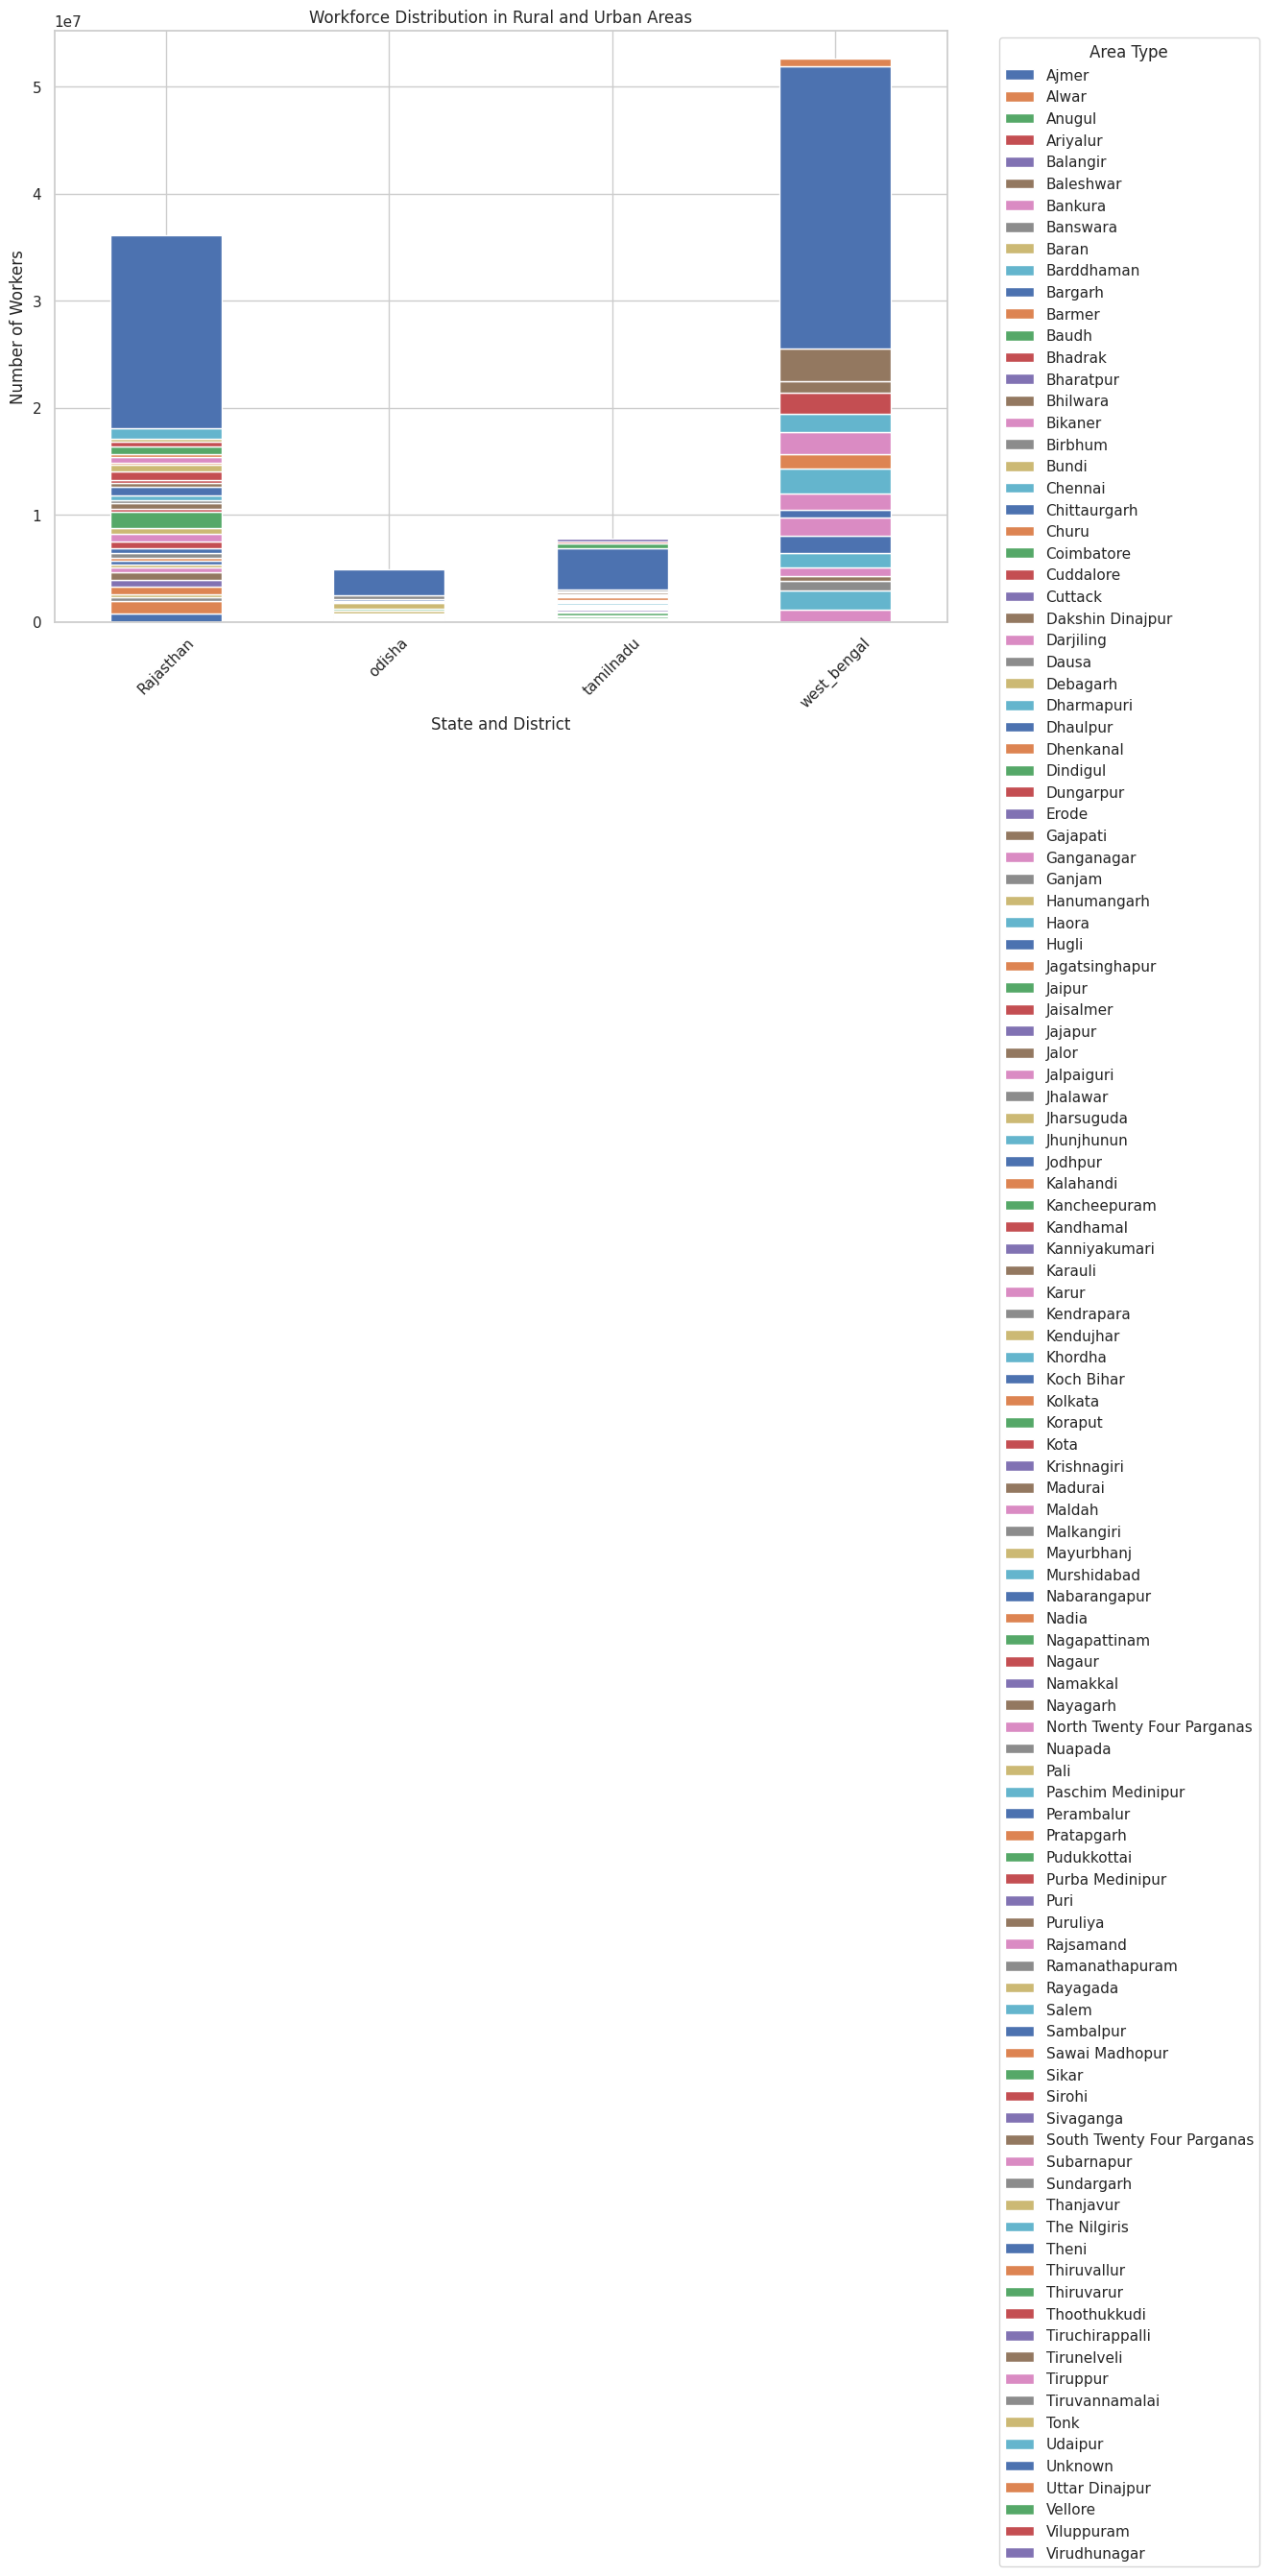

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Aggregate the data by state and district
rural_urban_agg = df_filtered.groupby(["STATE", "DISTRICT"])[["Total_Rural_Workers", "Total_Urban_Workers"]].sum().reset_index()

# Create a bar plot for total rural and urban workers by state and district
plt.figure(figsize=(12, 8))
rural_urban_agg.set_index(["STATE", "DISTRICT"])['Total_Rural_Workers'].unstack().plot(kind='bar', stacked=True, figsize=(12, 8), title="Workforce Distribution in Rural and Urban Areas")

# Customize the plot
plt.ylabel("Number of Workers")
plt.xlabel("State and District")
plt.xticks(rotation=45)
plt.legend(title="Area Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [45]:
# Filter the dataset for Tamil Nadu
df_tamilnadu = df[df["STATE"] == "tamilnadu"]

# Calculate total workforce in rural & urban areas (Main + Marginal)
df_tamilnadu["Total_Rural_Workers"] = df_tamilnadu["Main Workers - Rural -  Persons"] + df_tamilnadu["Marginal Workers - Rural -  Persons"]
df_tamilnadu["Total_Urban_Workers"] = df_tamilnadu["Main Workers - Urban -  Persons"] + df_tamilnadu["Marginal Workers - Urban -  Persons"]

# Aggregate workforce by district and industry classification for Tamil Nadu
rural_urban_distribution_tamilnadu = df_tamilnadu.groupby(["STATE", "DISTRICT"])[["Total_Rural_Workers", "Total_Urban_Workers"]].sum().reset_index()

# Display the result
rural_urban_distribution_tamilnadu


<ipython-input-45-3f81df845543>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-3f81df845543>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATE,DISTRICT,Total_Rural_Workers,Total_Urban_Workers
0,tamilnadu,Ariyalur,26526,7928
1,tamilnadu,Chennai,0,849339
2,tamilnadu,Coimbatore,109098,398477
3,tamilnadu,Cuddalore,125268,92069
4,tamilnadu,Dharmapuri,87804,28386
5,tamilnadu,Dindigul,133120,111275
6,tamilnadu,Erode,86928,126559
7,tamilnadu,Kancheepuram,340018,417340
8,tamilnadu,Kanniyakumari,17180,49792
9,tamilnadu,Karur,72132,59752


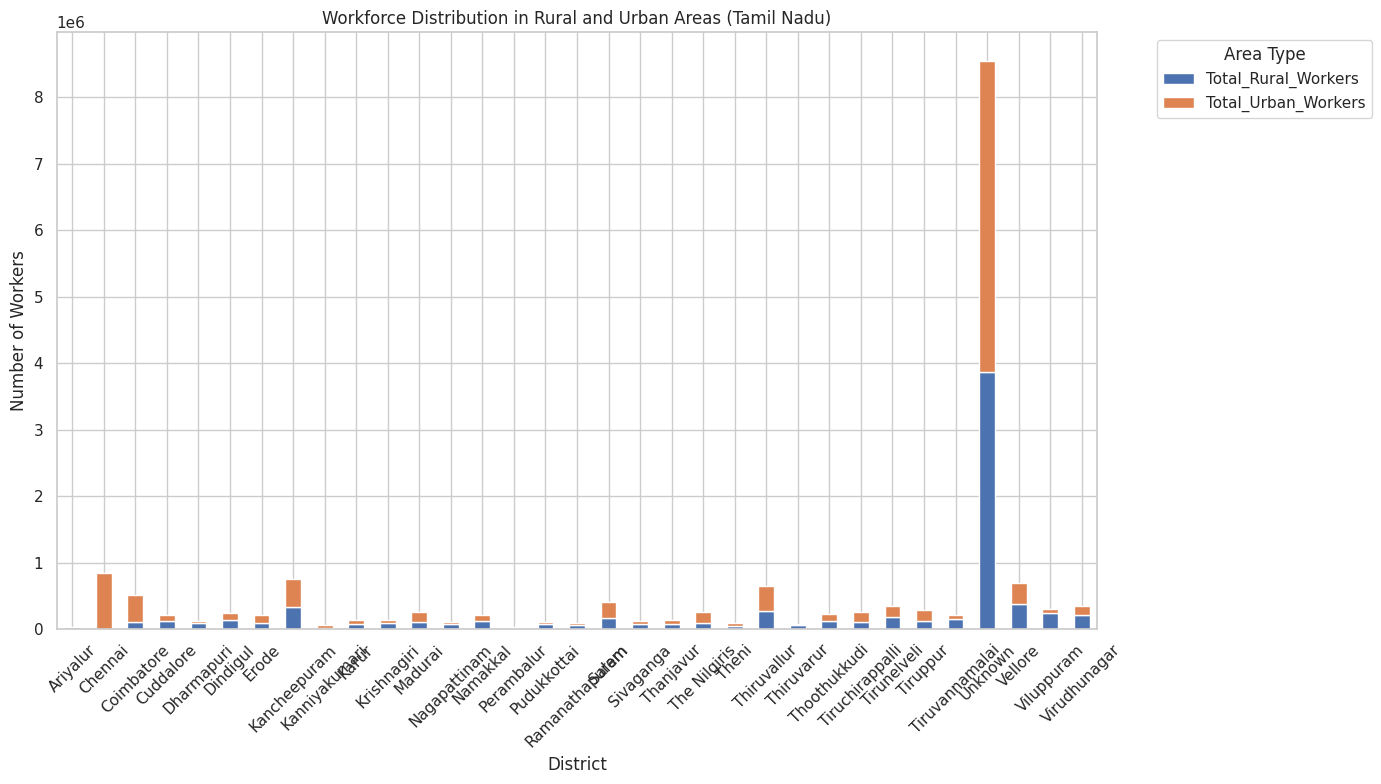

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Aggregate the data by district for Tamil Nadu
rural_urban_agg_tamilnadu = df_tamilnadu.groupby(["DISTRICT"])[["Total_Rural_Workers", "Total_Urban_Workers"]].sum().reset_index()

# Plot a stacked bar chart for total rural and urban workers by district in Tamil Nadu
rural_urban_agg_tamilnadu.set_index("DISTRICT")[['Total_Rural_Workers', 'Total_Urban_Workers']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    title="Workforce Distribution in Rural and Urban Areas (Tamil Nadu)"
)

# Customize the plot
plt.ylabel("Number of Workers")
plt.xlabel("District")
plt.xticks(rotation=45)
plt.legend(title="Area Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
